In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from skimage import measure, io
from skimage.color import label2rgb
from skimage.morphology import opening, closing, disk
import matplotlib.patches as mpatches
from alberte_klara_lib import do_design, plot_map_three, plot_map_one, shiftedColorMap
from alberte_klara_lib import n_int_max, n_ext_max, theta_grid, phi_grid, SAA_extent

In [2]:
m_int = np.loadtxt('ready_swarm_data\int_model_parameters')
m_ext = np.loadtxt('ready_swarm_data\ext_model_parameters')
m = np.concatenate((m_int, m_ext))

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\e'
C:\Users\alber\AppData\Local\Temp\ipykernel_16864\2476196980.py:1: SyntaxWarning: invalid escape sequence '\i'
  m_int = np.loadtxt('ready_swarm_data\int_model_parameters')
C:\Users\alber\AppData\Local\Temp\ipykernel_16864\2476196980.py:2: SyntaxWarning: invalid escape sequence '\e'
  m_ext = np.loadtxt('ready_swarm_data\ext_model_parameters')


# Evaluating the Swarm model at surface of Earth

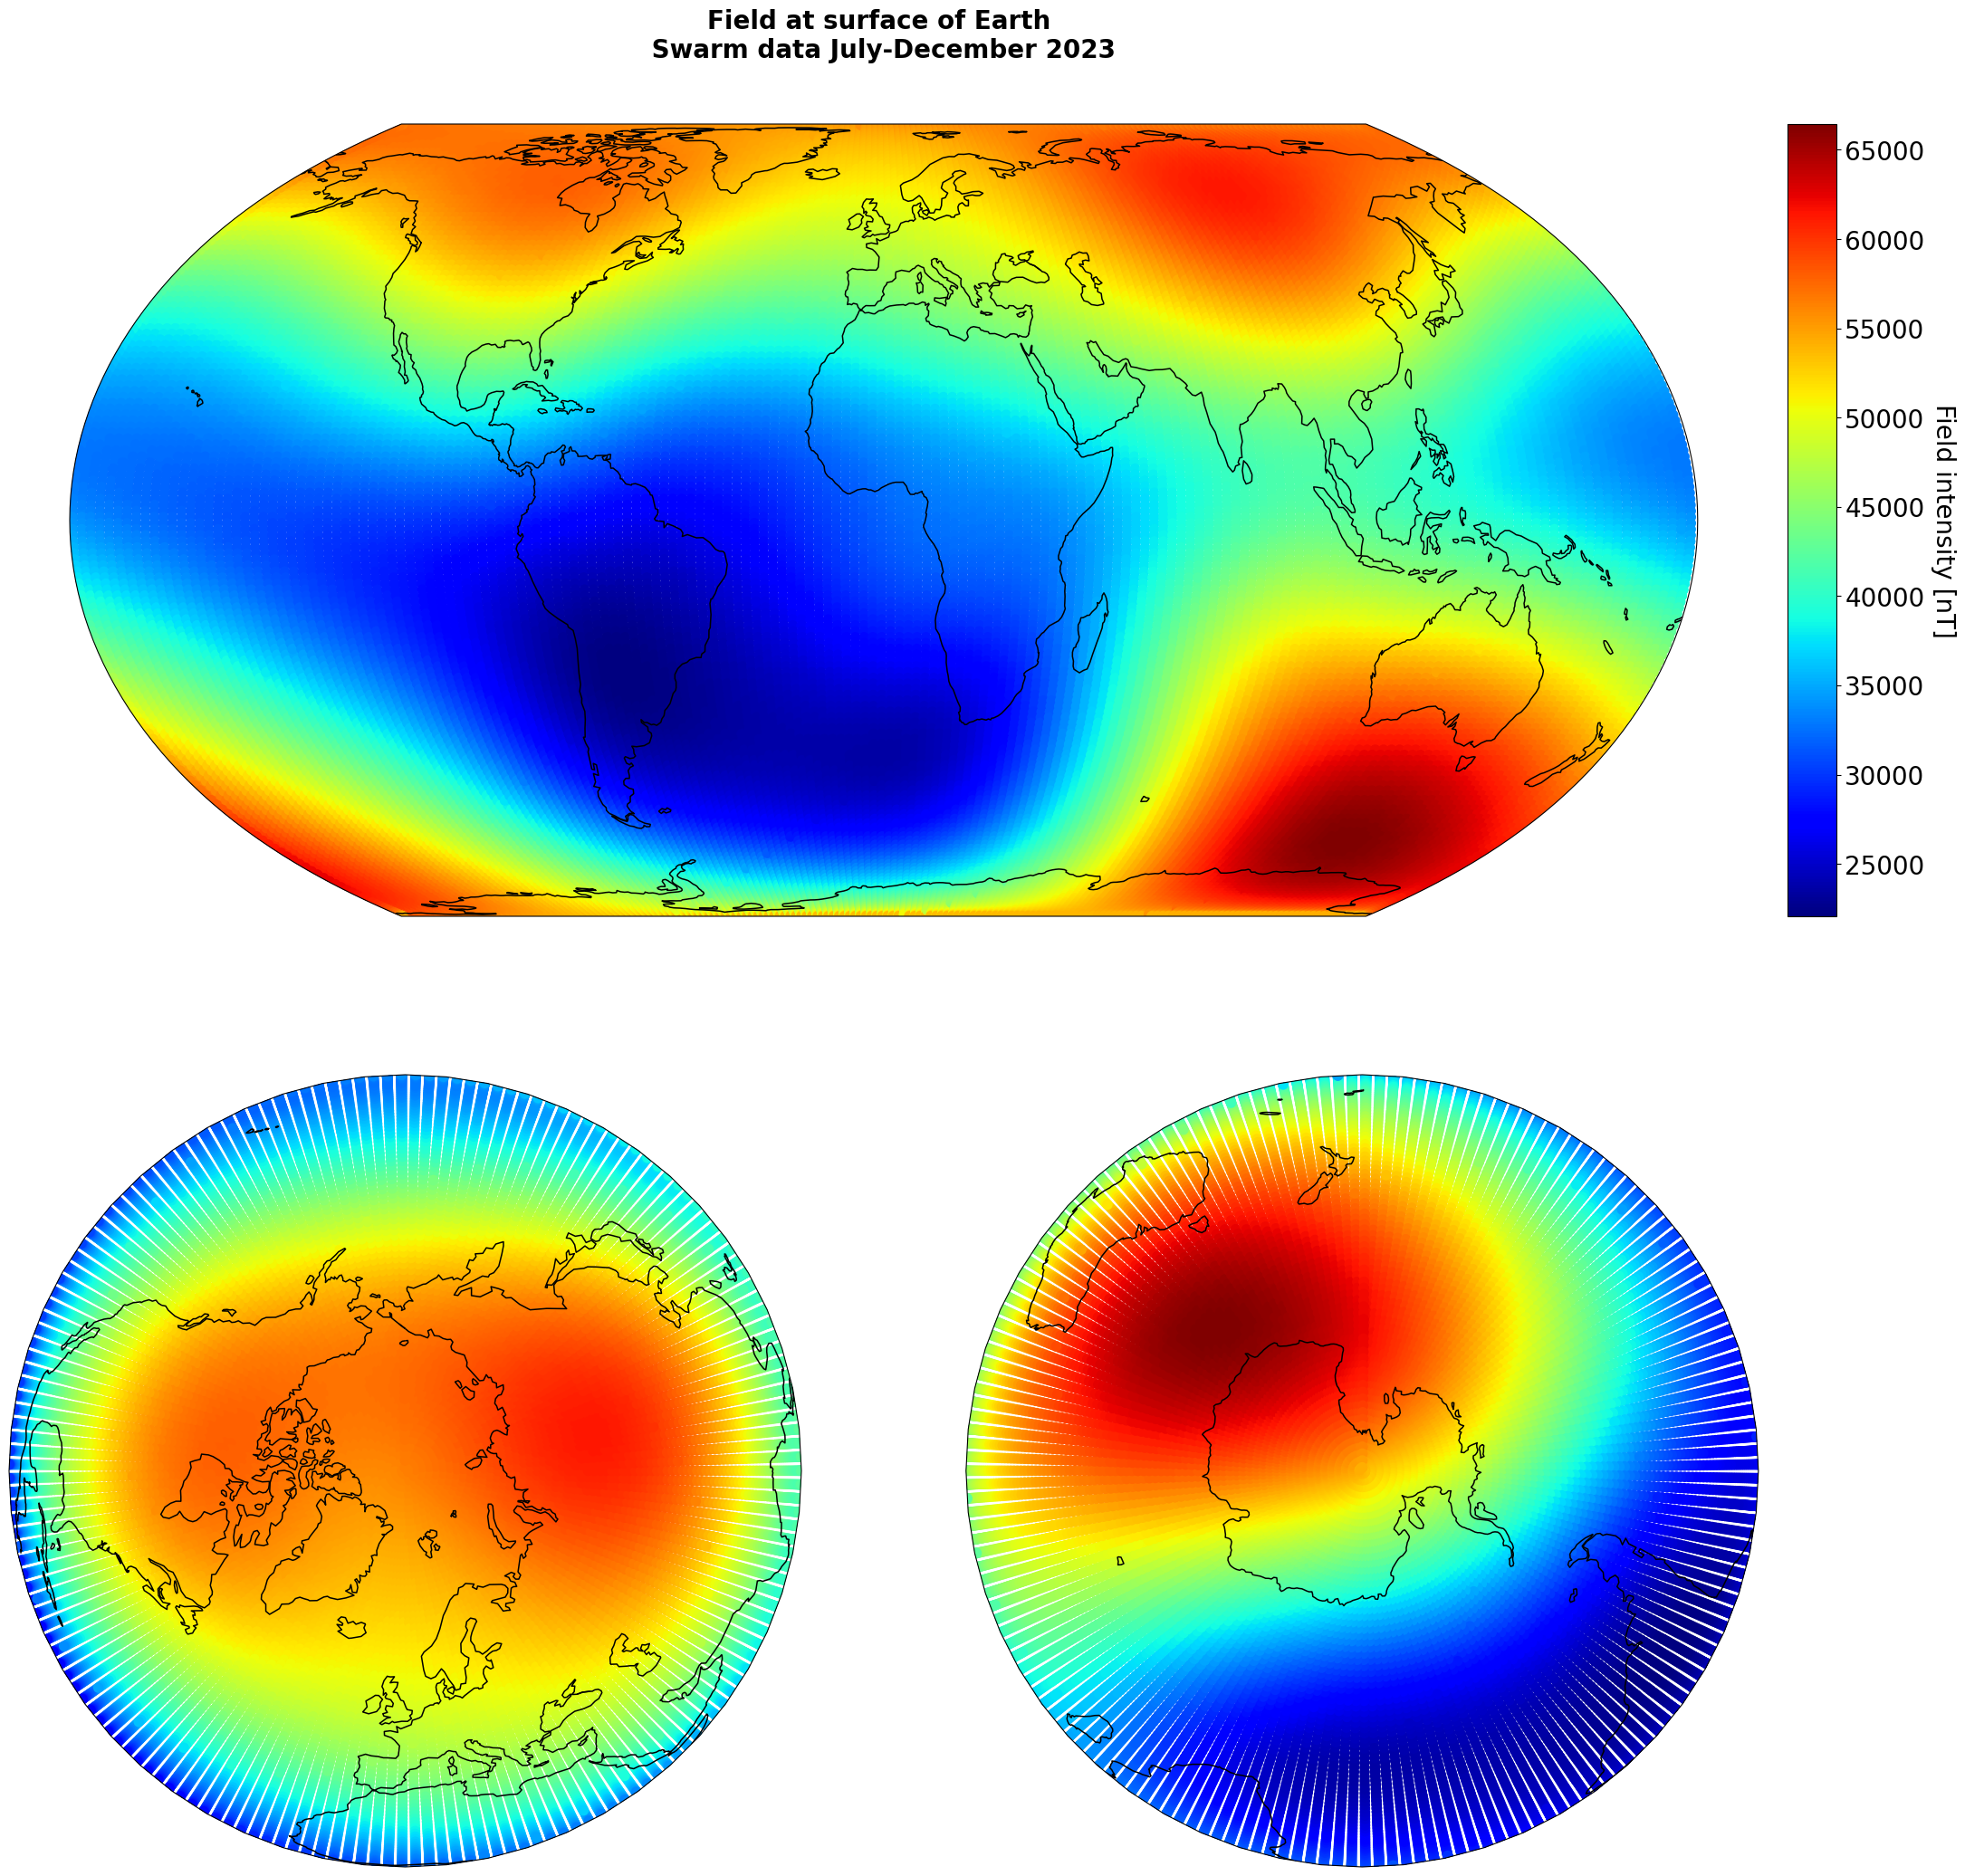

In [3]:
radius_surface = 6378
G_down_radius, G_down_theta, G_down_phi = do_design(radius_surface, theta_grid, phi_grid, n_int_max, n_ext_max)

d_down_r = G_down_radius @ m
d_down_theta = G_down_theta @ m
d_down_phi = G_down_phi @ m

# field intensity
F_down = np.sqrt(d_down_r**2 + d_down_theta**2 + d_down_phi**2)

plot_map_three(F_down, phi_grid, theta_grid, sat = 'Swarm', title = 'Field at surface of Earth', label = 'Field intensity [nT]')

# Evaluating at CMB

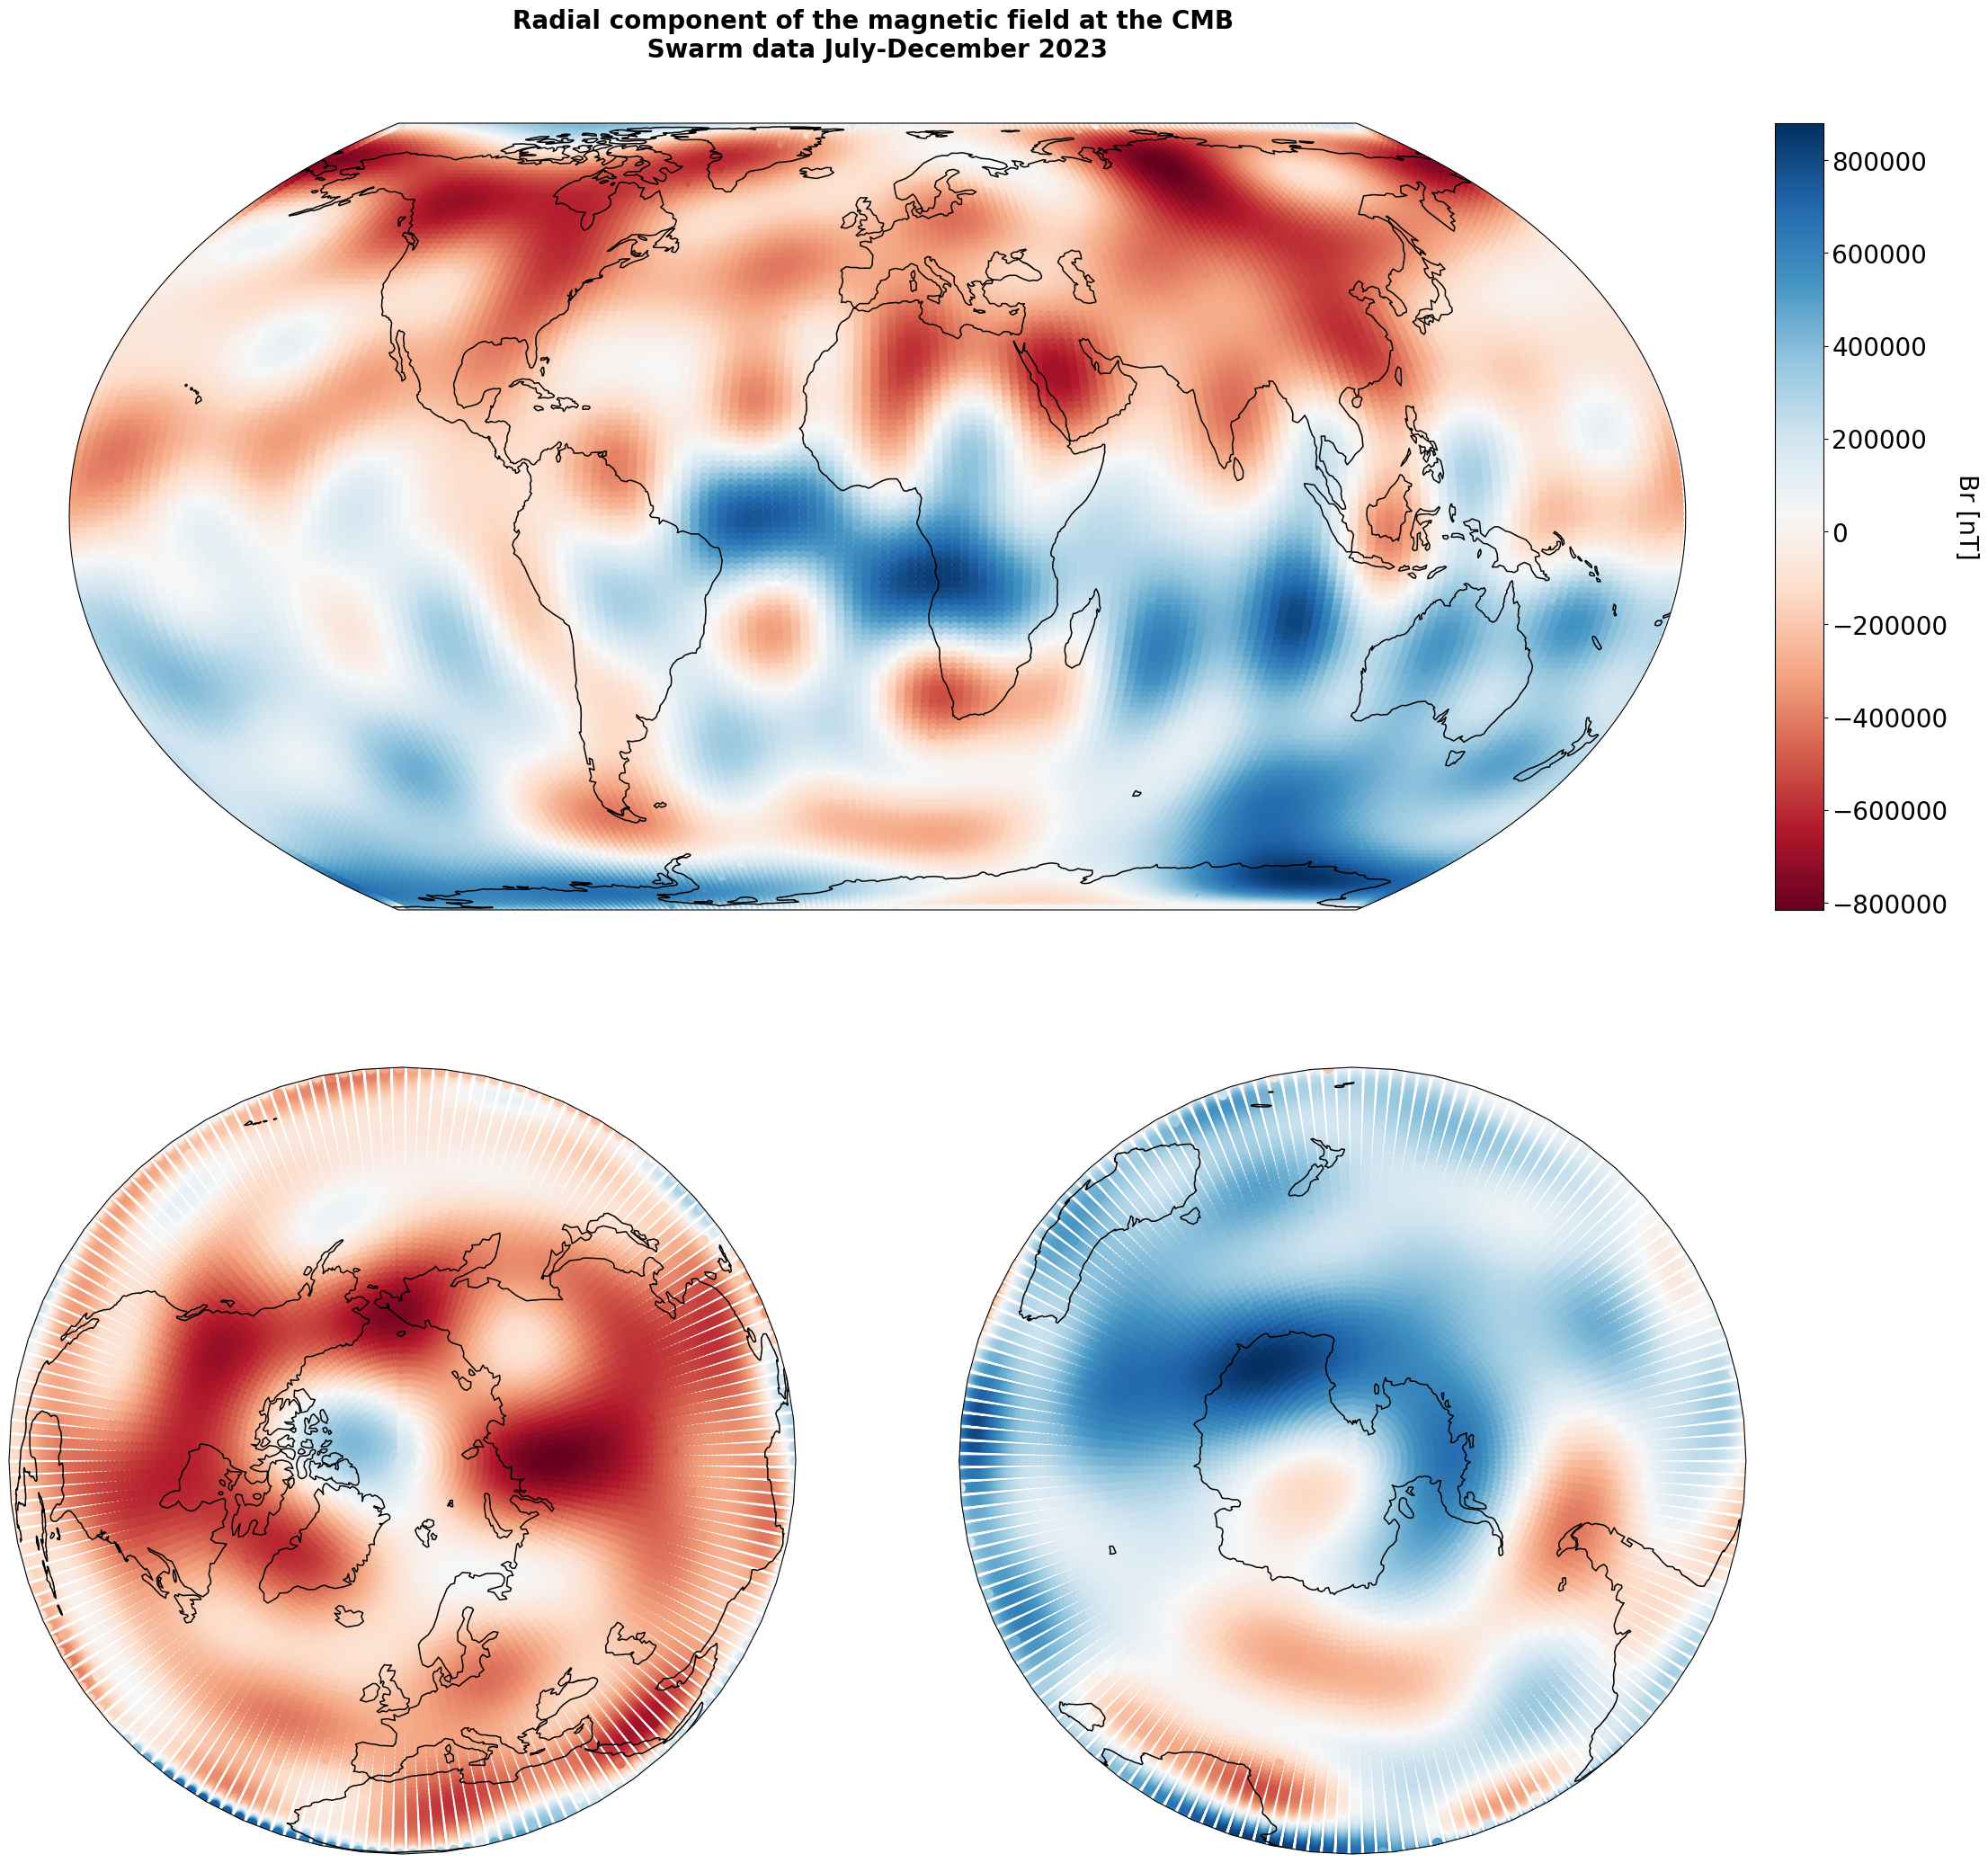

In [4]:
radius_CMB = 3485.  # km, core-mantle boundary

G_CMB_radius, G_CMB_theta, G_CMB_phi = do_design(radius_CMB, theta_grid, phi_grid, n_int_max, n_ext_max)

d_CMB_r = G_CMB_radius @ m
d_CMB_theta = G_CMB_theta @ m
d_CMB_phi = G_CMB_phi @ m

plot_map_three(d_CMB_r, phi_grid, theta_grid, sat = 'swarm', title = 'Radial component of the magnetic field at the CMB', label = 'Br [nT]', colors = 'RdBu')

# Magnetic field contour lines

In [5]:
# Mesh grids needed to plot with ax.contour
theta = np.linspace(0., 180., num=181)  # colatitude in degrees
phi = np.linspace(-180., 180., num=361)  # longitude in degrees

phi_meshgrid, theta_meshgrid = np.meshgrid(phi, theta)

At surface of Earth

c:\Users\alber\anaconda3\envs\EPM\Lib\site-packages\chaosmagpy\model_utils.py:787: UserWarning: Input coordinates include the poles.
  warnings.warn('Input coordinates include the poles.')


Text(0.5, 1.0, 'Field intensity at surface of the Earth \n Swarm data July-December 2023 \n \n')

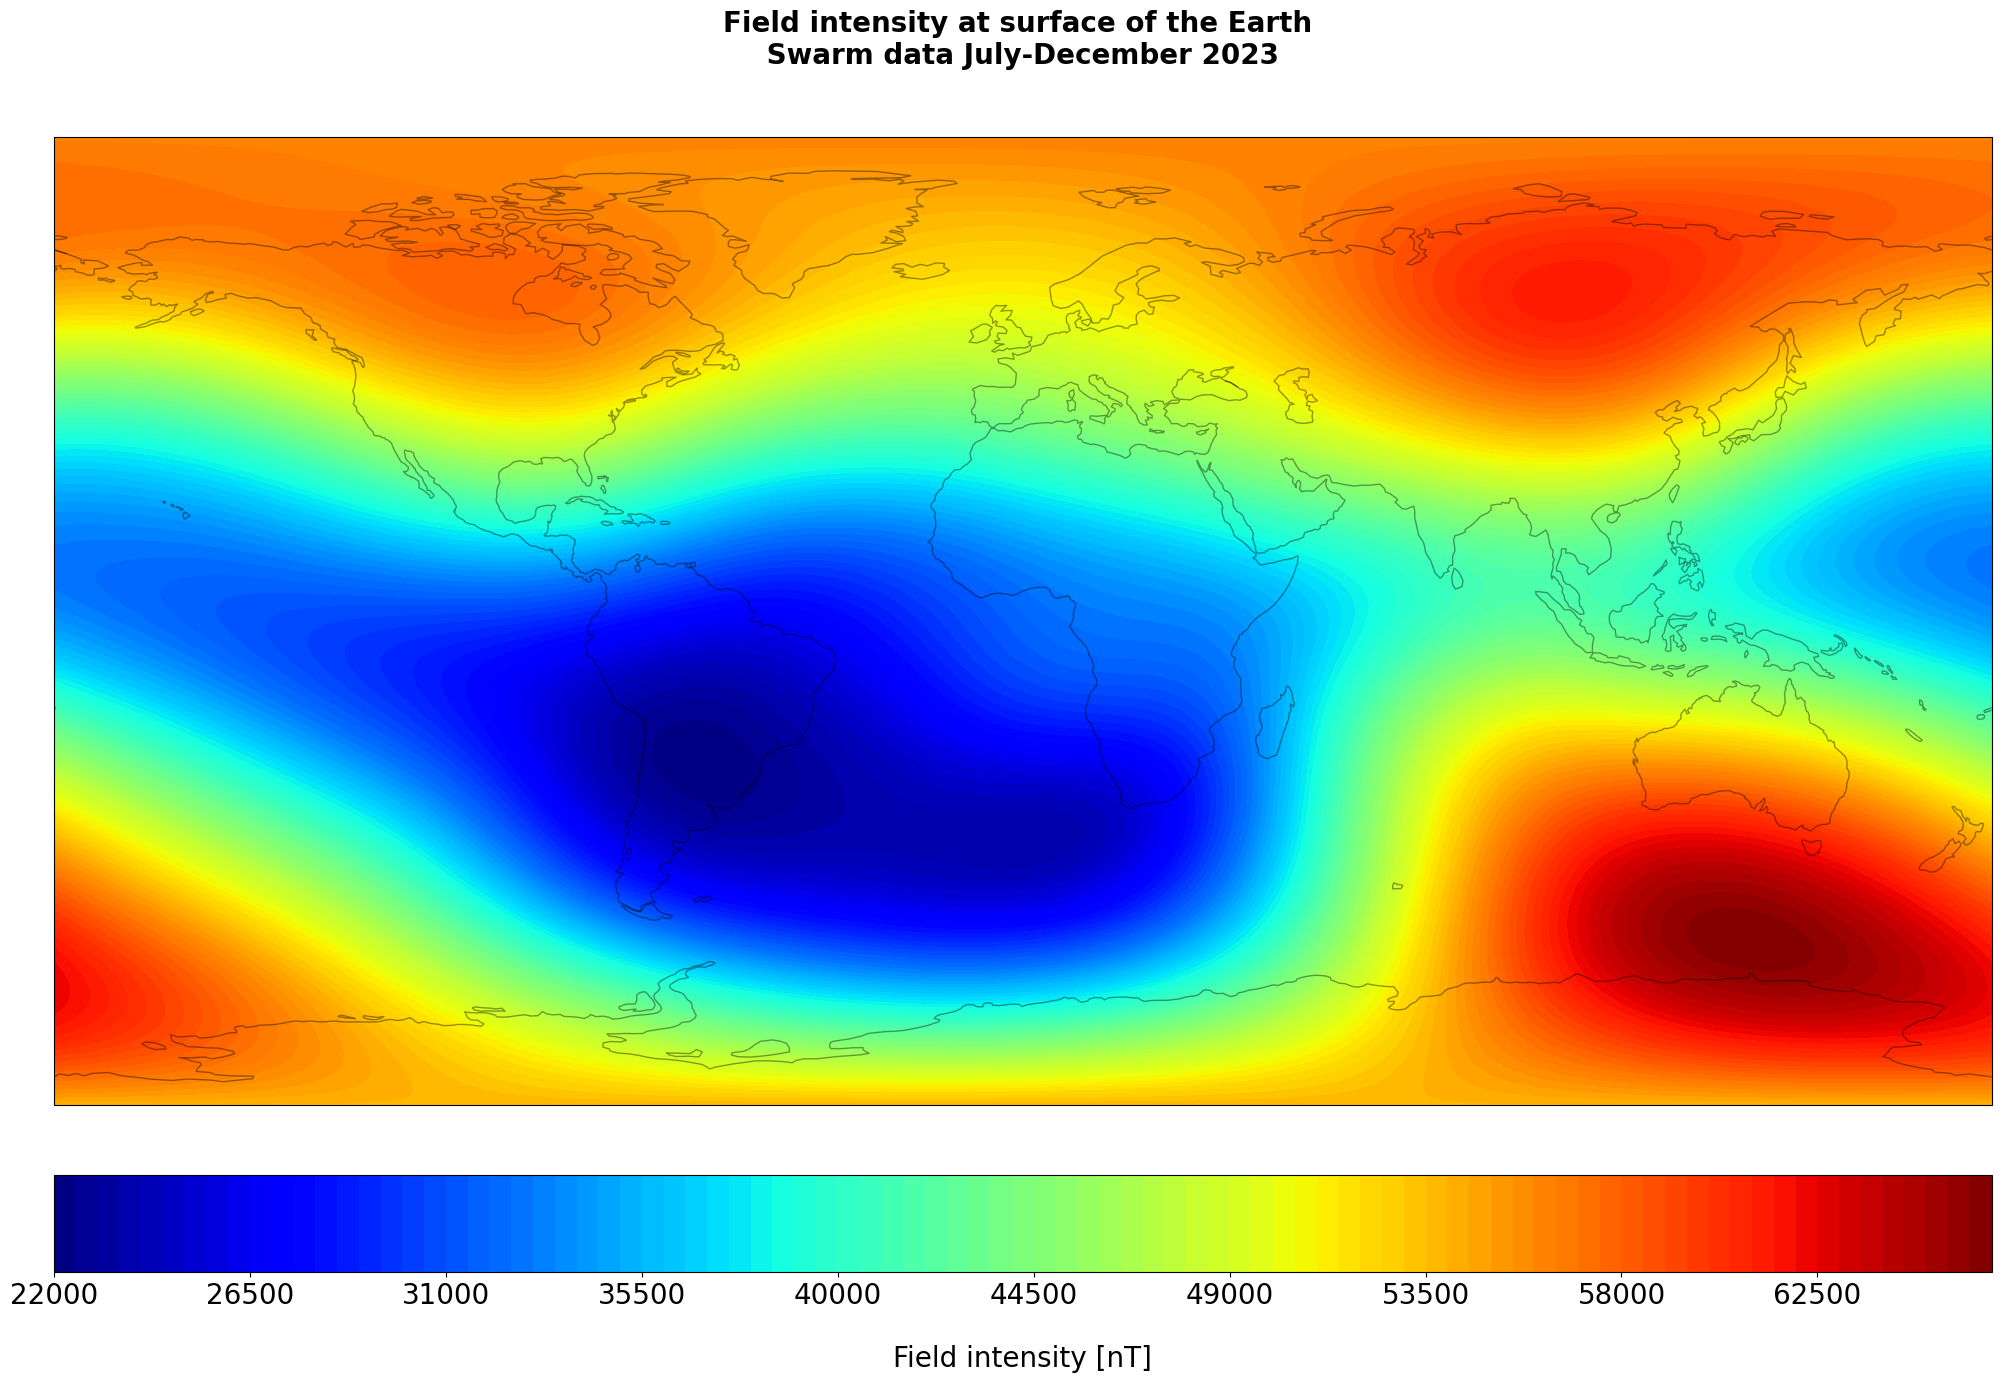

In [6]:

radius_meshgrid = radius_surface*np.ones(phi_meshgrid.shape)

G_surface_radius, G_surface_theta, G_surface_phi = do_design(radius_meshgrid.ravel(), theta_meshgrid.ravel(), phi_meshgrid.ravel(), n_int_max, n_ext_max)
d_surface_r = G_surface_radius @ m
d_surface_t = G_surface_theta @ m
d_surface_p = G_surface_phi @ m

F_surface = np.sqrt(d_surface_r**2 + d_surface_t**2 + d_surface_p**2).reshape(theta_meshgrid.shape)

levels = len(np.arange(np.min(F_surface), np.max(F_surface), 500)) # contours of 500nT

fig = plt.figure(figsize=(25, 18))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines('110m', alpha=0.4)
filled_c = ax.contourf(phi_meshgrid, 90-theta_meshgrid, F_surface.reshape(theta_meshgrid.shape), transform=ccrs.PlateCarree(), cmap = 'jet', levels = levels)
clb = fig.colorbar(filled_c, orientation='horizontal', pad = 0.05)
clb.ax.tick_params(labelsize=20)
clb.set_label('Field intensity [nT]', labelpad=25, fontsize=20)
plt.title('Field intensity at surface of the Earth \n Swarm data July-December 2023 \n \n', weight='bold', fontsize=20) 

At CMB

In [7]:

radius_meshgrid = radius_CMB*np.ones(phi_meshgrid.shape)

G_CMB_radius, G_CMB_theta, G_CMB_phi = do_design(radius_meshgrid.ravel(), theta_meshgrid.ravel(), phi_meshgrid.ravel(), n_int_max, n_ext_max)
d_CMB_r = G_CMB_radius @ m

c:\Users\alber\anaconda3\envs\EPM\Lib\site-packages\chaosmagpy\model_utils.py:787: UserWarning: Input coordinates include the poles.
  warnings.warn('Input coordinates include the poles.')


Text(0.5, 1.0, 'Radial component at CMB \n Swarm data July-December 2023 \n \n')

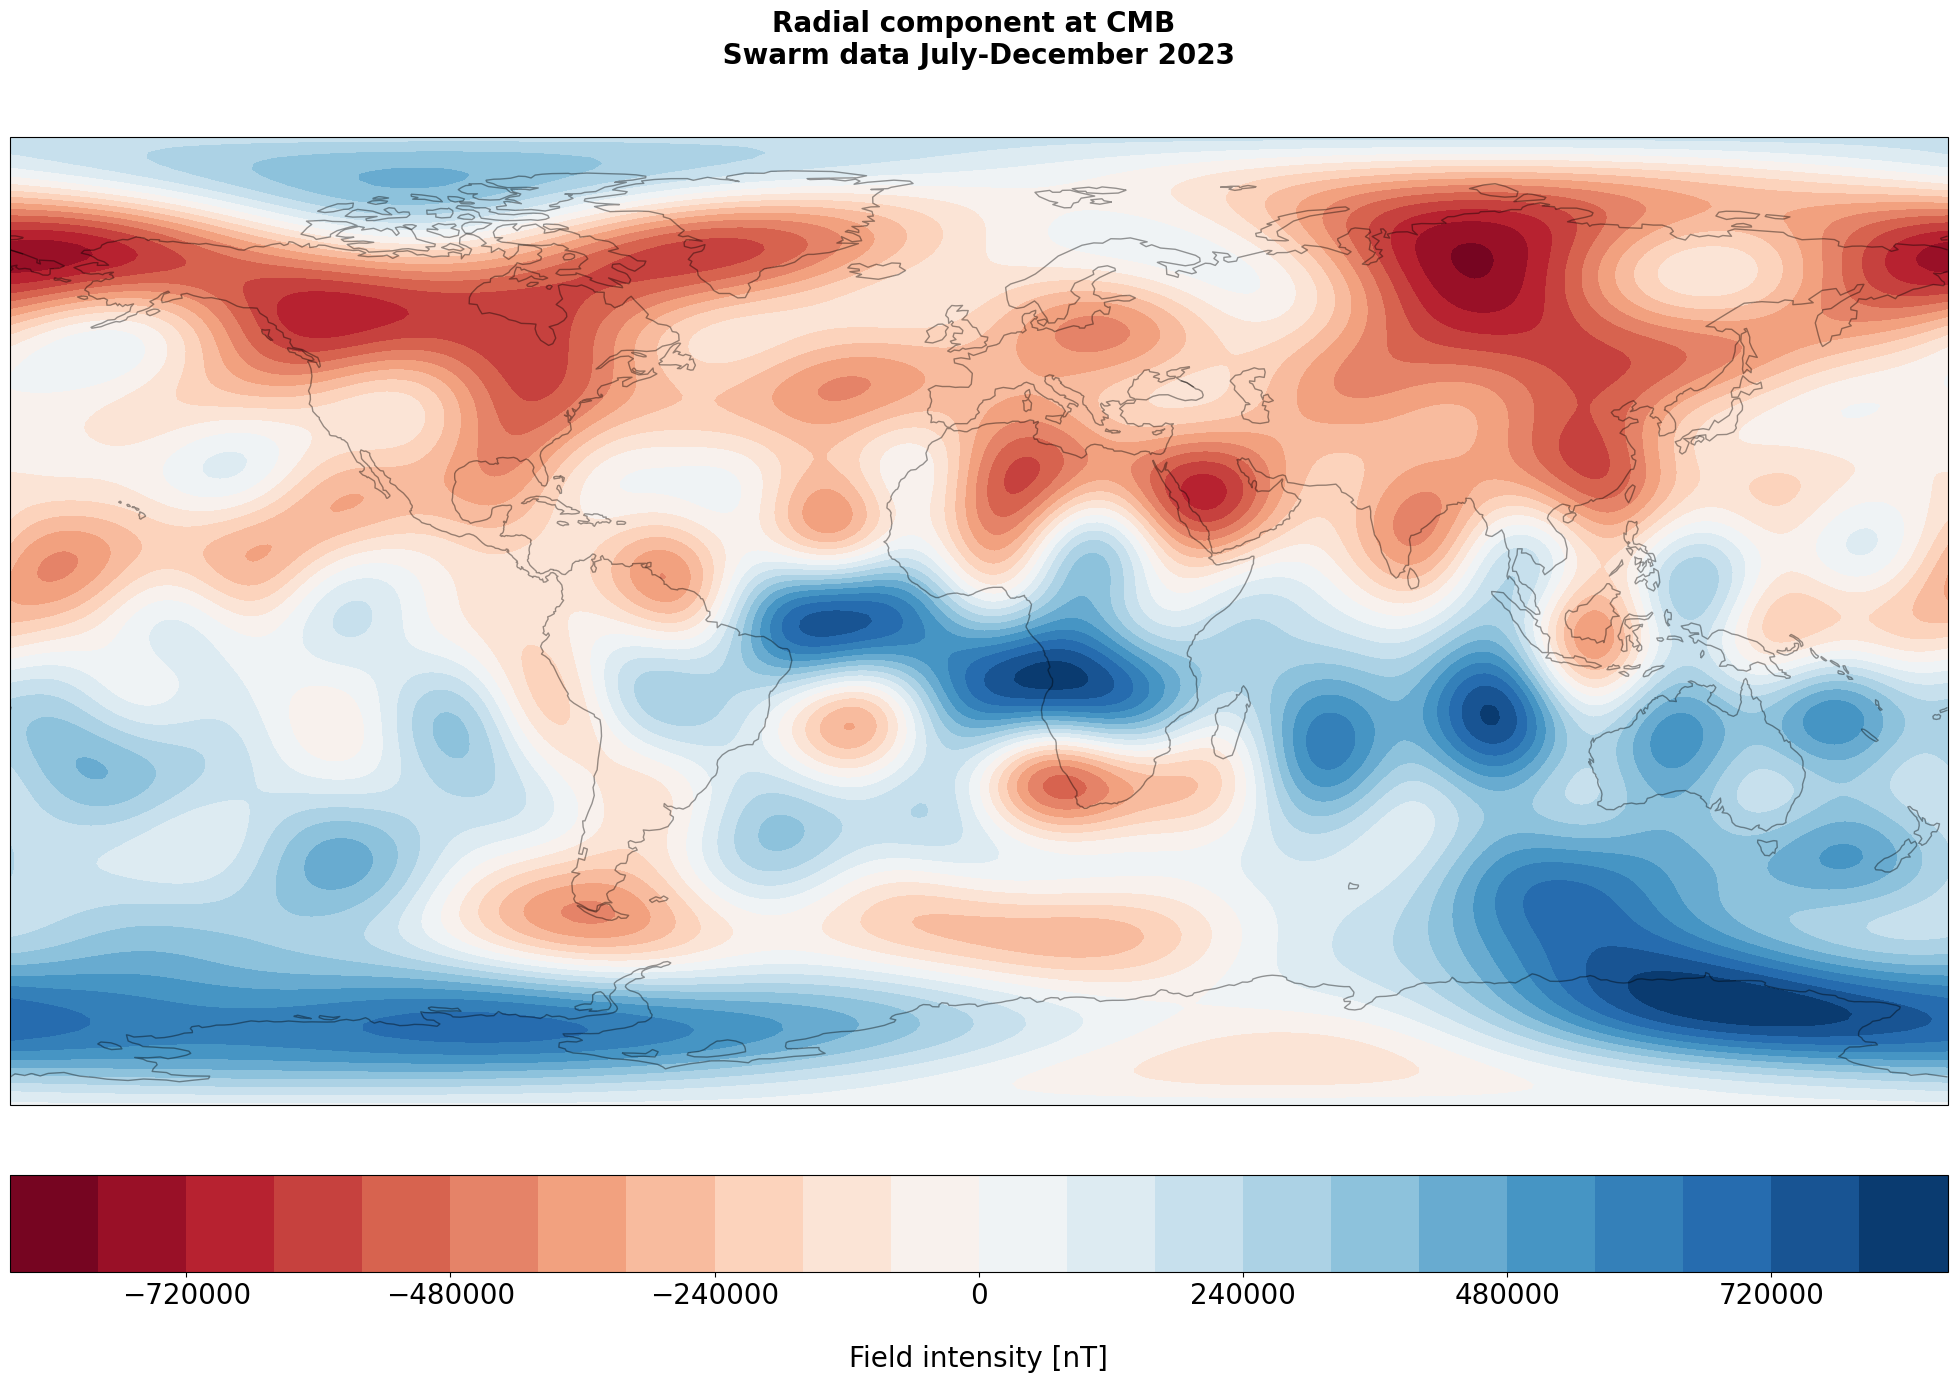

In [8]:
fig = plt.figure(figsize=(25, 18))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines('110m', alpha=0.4)
filled_c = ax.contourf(phi_meshgrid, 90-theta_meshgrid, d_CMB_r.reshape(theta_meshgrid.shape), transform=ccrs.PlateCarree(), cmap = 'RdBu', levels = 25)
clb = fig.colorbar(filled_c, orientation='horizontal', pad = 0.05)
clb.ax.tick_params(labelsize=20)
clb.set_label('Field intensity [nT]', labelpad=25, fontsize=20)
plt.title('Radial component at CMB \n Swarm data July-December 2023 \n \n', weight='bold', fontsize=20) 

# fig = plt.figure(figsize=(25, 25))

# # Setup a global EckertIII map with faint coastlines.
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.EqualEarth())
# ax.set_global()
# ax.coastlines('110m', alpha=0.2)
# filled_c = ax.contourf(phi_meshgrid, 90-theta_meshgrid, d_CMB_r.reshape(theta_meshgrid.shape), transform=ccrs.PlateCarree(), cmap='RdBu')
# line_c = ax.contour(phi_meshgrid, 90-theta_meshgrid, d_CMB_r.reshape(theta_meshgrid.shape), levels=filled_c.levels, colors=['black'], transform=ccrs.PlateCarree())
# fig.colorbar(filled_c, orientation='horizontal')

# plt.show()

# Zooming in on SAA

In [9]:
theta_SAA = np.linspace(SAA_extent[0][0], SAA_extent[0][1], num=181)  # colatitude in degrees
phi_SAA = np.linspace(SAA_extent[1][0], SAA_extent[1][1], num=361)  # longitude in degrees

phi_grid_SAA, theta_grid_SAA = np.meshgrid(phi_SAA, theta_SAA)
radius_grid_SAA = radius_CMB*np.ones(phi_grid_SAA.shape)

G_CMB_radius_SAA, G_CMB_theta_SAA, G_CMB_phi_SAA = do_design(radius_grid_SAA.ravel(), theta_grid_SAA.ravel(), phi_grid_SAA.ravel(), n_int_max, n_ext_max)
d_CMB_r_SAA = G_CMB_radius_SAA @ m


Text(0.5, 1.0, 'Radial component at CMB \n Swarm data July-December 2023 \n \n (SAA window vaguely estimated by inspection of map)\n \n')

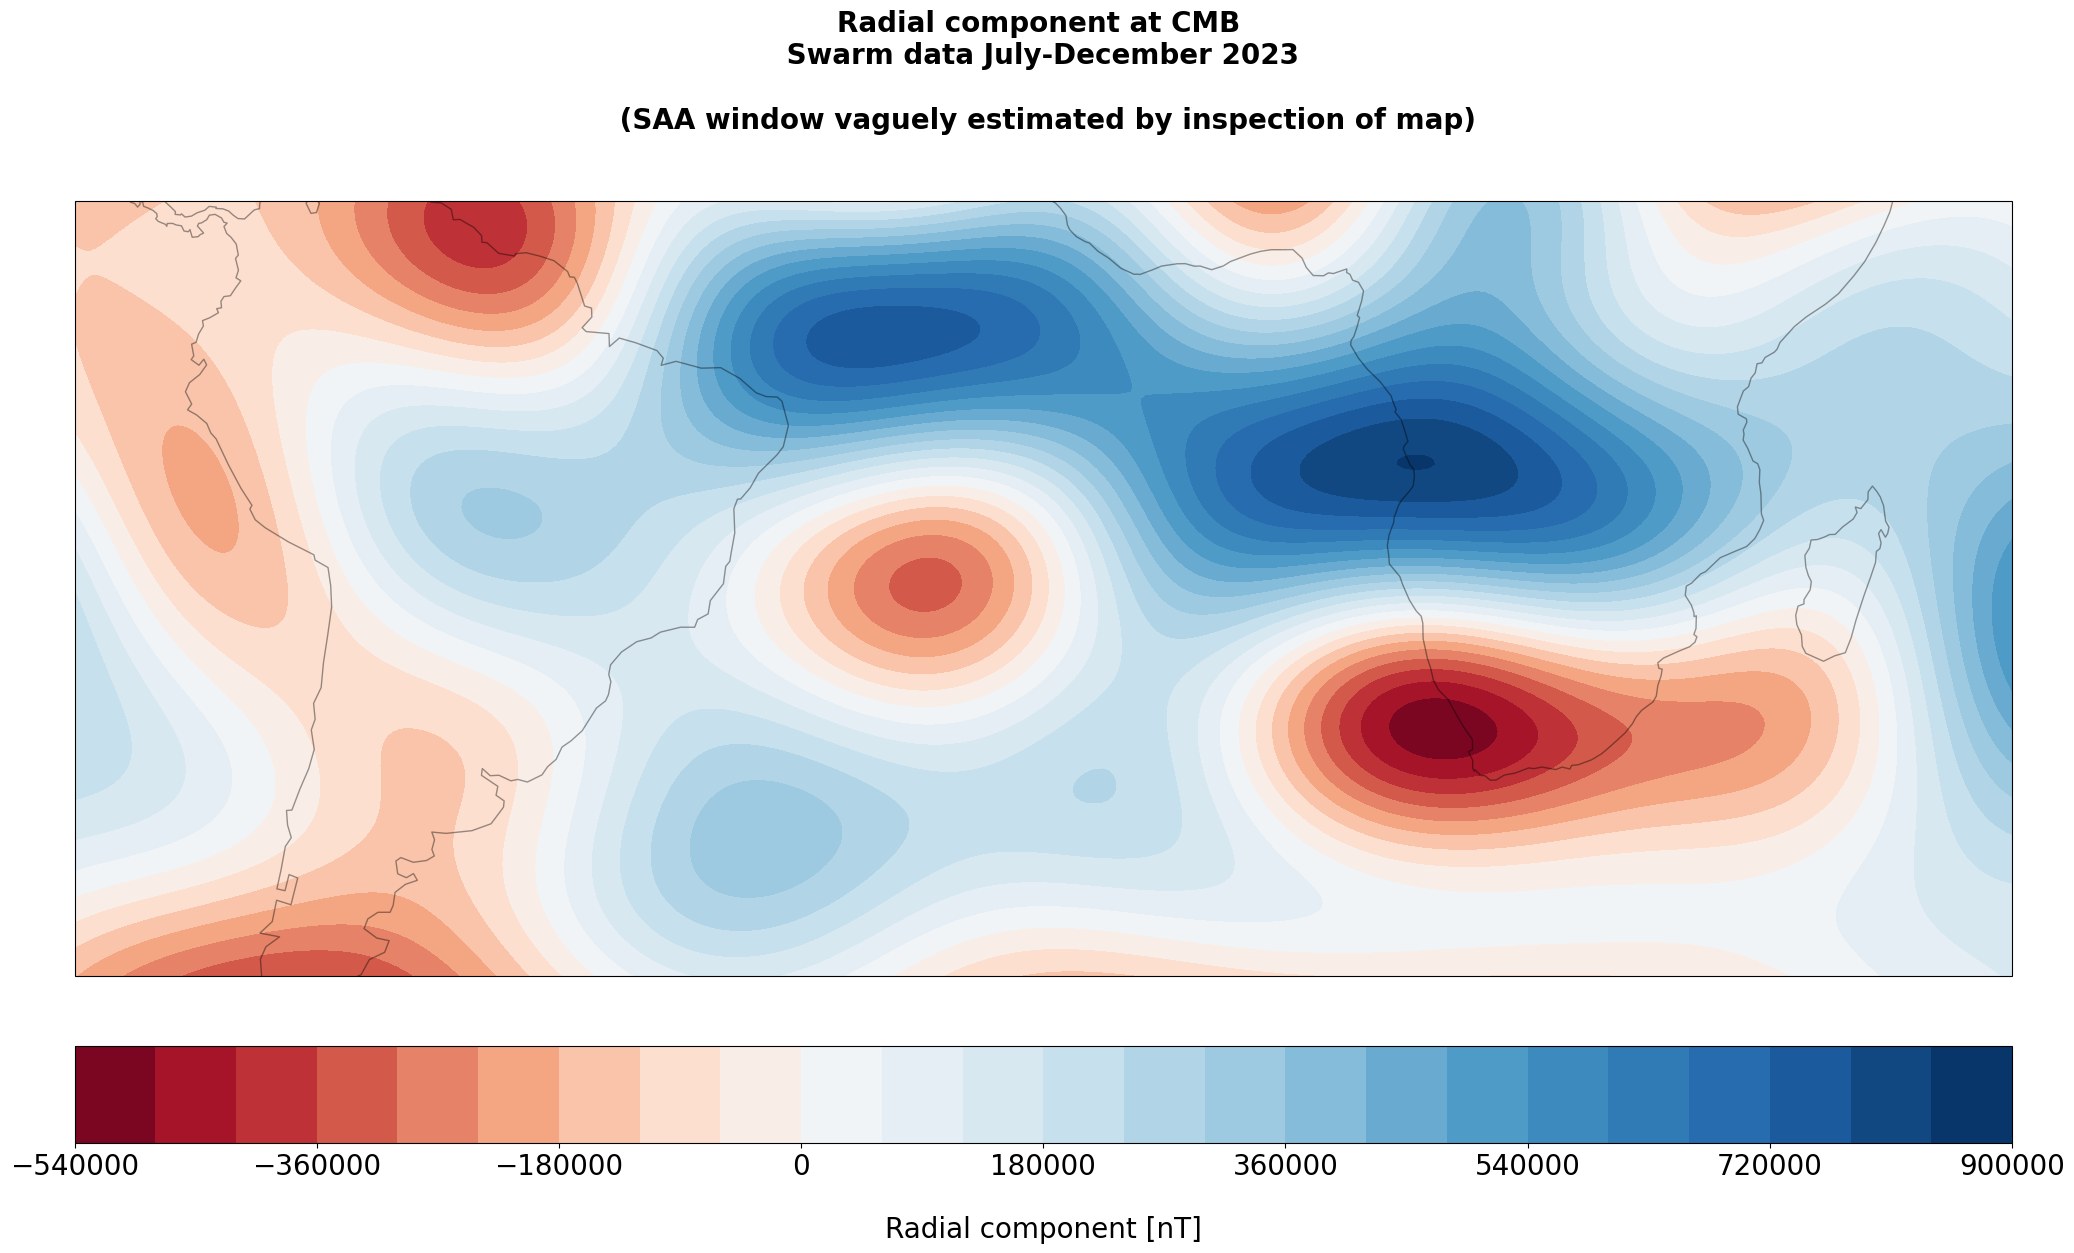

In [10]:
# data is heavily biased so we will have to shift the color bar if it is to be centred at zero
# # THE FOLLOWING THREE LINES SHOULD ONLY BE RUN ONCE. Restart kernel to run again
# orig_cmap = matplotlib.cm.RdBu
# mid = 1 - max(d_CMB_r_SAA) / (max(d_CMB_r_SAA) + abs(min(d_CMB_r_SAA)))
# shifted_cmap = shiftedColorMap(orig_cmap, midpoint = round(mid, 2), stop = 1.)


# ax.set_extent([SAA_extent[1][0], SAA_extent[1][1], 90 - SAA_extent[0][0], 90 - SAA_extent[0][1]], crs=ccrs.PlateCarree()) # takes long, lat
# plot_map_one(d_CMB_r_SAA, phi_grid_SAA.ravel(), theta_grid_SAA.ravel(), 'swarm', 'title', 'Radial component [nT]', colors = shifted_cmap)




fig = plt.figure(figsize=(25, 18))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines('110m', alpha=0.4)
filled_c = ax.contourf(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape), transform=ccrs.PlateCarree(), cmap = shifted_cmap, levels = 25)
# line_c = ax.contour(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape), levels=filled_c.levels, colors=['grey'], 
#                     linewidths = 1, transform=ccrs.PlateCarree())
ax.set_extent([SAA_extent[1][0], SAA_extent[1][1], 90 - SAA_extent[0][0], 90 - SAA_extent[0][1]], crs=ccrs.PlateCarree()) # takes long, lat

clb = fig.colorbar(filled_c, orientation='horizontal', pad = 0.05)
clb.ax.tick_params(labelsize=20)
clb.set_label('Radial component [nT]', labelpad=25, fontsize=20)
plt.title('Radial component at CMB \n Swarm data July-December 2023 \n \n (SAA window vaguely estimated by inspection of map)\n \n', weight='bold', fontsize=20) 

In [11]:
# printing all contour levels

#Get all the contour levels
contour_levels = filled_c.levels

# Print all the contour levels
# print("Contour levels:")
# for level in contour_levels:
#     print(level)

In [12]:
# with these specific values,  each has 6 contour levels
specific_value_min = -80000
specific_value_max = 540000

# Find the contour levels closest to the specific value
contour_levels = filled_c.levels
closest_level_min = min(contour_levels, key=lambda x: abs(x - specific_value_min))
closest_level_max = min(contour_levels, key=lambda x: abs(x - specific_value_max))

print("Closest contour level to", specific_value_min, " and", specific_value_max, ":", closest_level_min, "and", closest_level_max)

Closest contour level to -80000  and 540000 : -60000.0 and 540000.0


Text(0.5, 1.0, 'Radial component at CMB \n Swarm data July-December 2023 \n \n (SAA window vaguely estimated by inspection of map)\n \n')

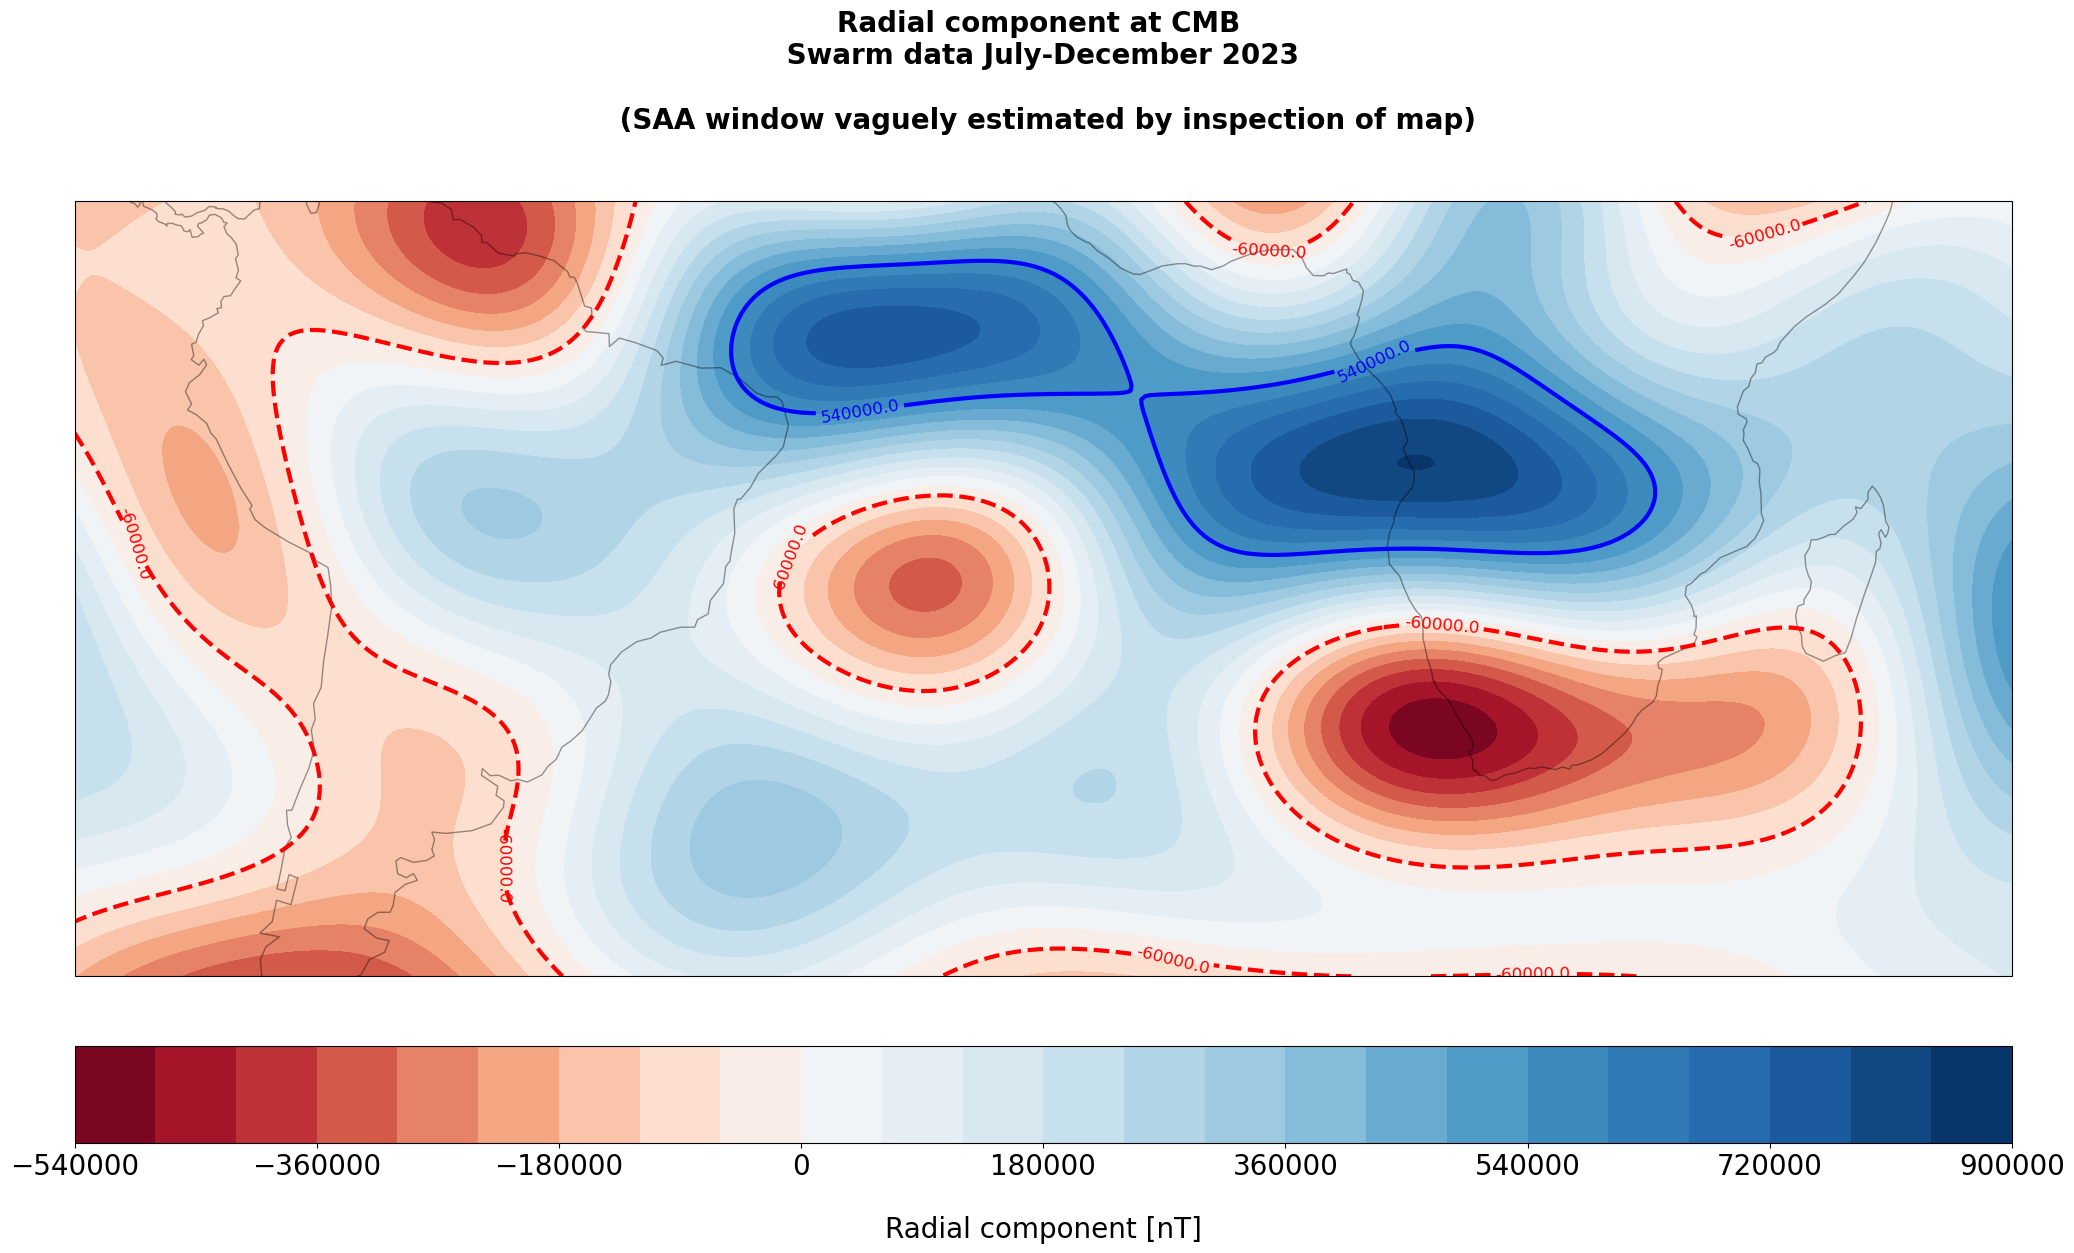

In [13]:
# Define the specific contour level to highlight
specific_contour_level = 0

fig = plt.figure(figsize=(25, 18))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines('110m', alpha=0.4)
filled_c = ax.contourf(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape), transform=ccrs.PlateCarree(), cmap = shifted_cmap, levels = 25)
# line_c = ax.contour(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape), levels=filled_c.levels, colors=['grey'], 
#                     linewidths = 1, transform=ccrs.PlateCarree())
ax.set_extent([SAA_extent[1][0], SAA_extent[1][1], 90 - SAA_extent[0][0], 90 - SAA_extent[0][1]], crs=ccrs.PlateCarree()) # takes long, lat

# # Highlight the specific contour level with a distinct color and thicker linewidth
# specific_contour = ax.contour(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape),
#                               levels=[specific_contour_level], colors='green', linewidths=3)
# # Add labels to the specific contour level
# plt.clabel(specific_contour, fmt={specific_contour_level: str(specific_contour_level)}, fontsize=12, inline=True)

# Highlight the specific contour level with a distinct color and thicker linewidth
specific_contour = ax.contour(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape),
                              levels=[closest_level_min], colors='red', linewidths=3)
# Add labels to the specific contour level
plt.clabel(specific_contour, fmt={closest_level_min: str(closest_level_min)}, fontsize=12, inline=True)

# Highlight the specific contour level with a distinct color and thicker linewidth
specific_contour = ax.contour(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape),
                              levels=[closest_level_max], colors='blue', linewidths=3)
# Add labels to the specific contour level
plt.clabel(specific_contour, fmt={closest_level_max: str(closest_level_max)}, fontsize=12, inline=True)

clb = fig.colorbar(filled_c, orientation='horizontal', pad = 0.05)
clb.ax.tick_params(labelsize=20)
clb.set_label('Radial component [nT]', labelpad=25, fontsize=20)
plt.title('Radial component at CMB \n Swarm data July-December 2023 \n \n (SAA window vaguely estimated by inspection of map)\n \n', weight='bold', fontsize=20) 

Text(0.5, 1.0, 'Radial component at CMB \n Swarm data July-December 2023 \n \n (SAA window vaguely estimated by inspection of map)\n \n')

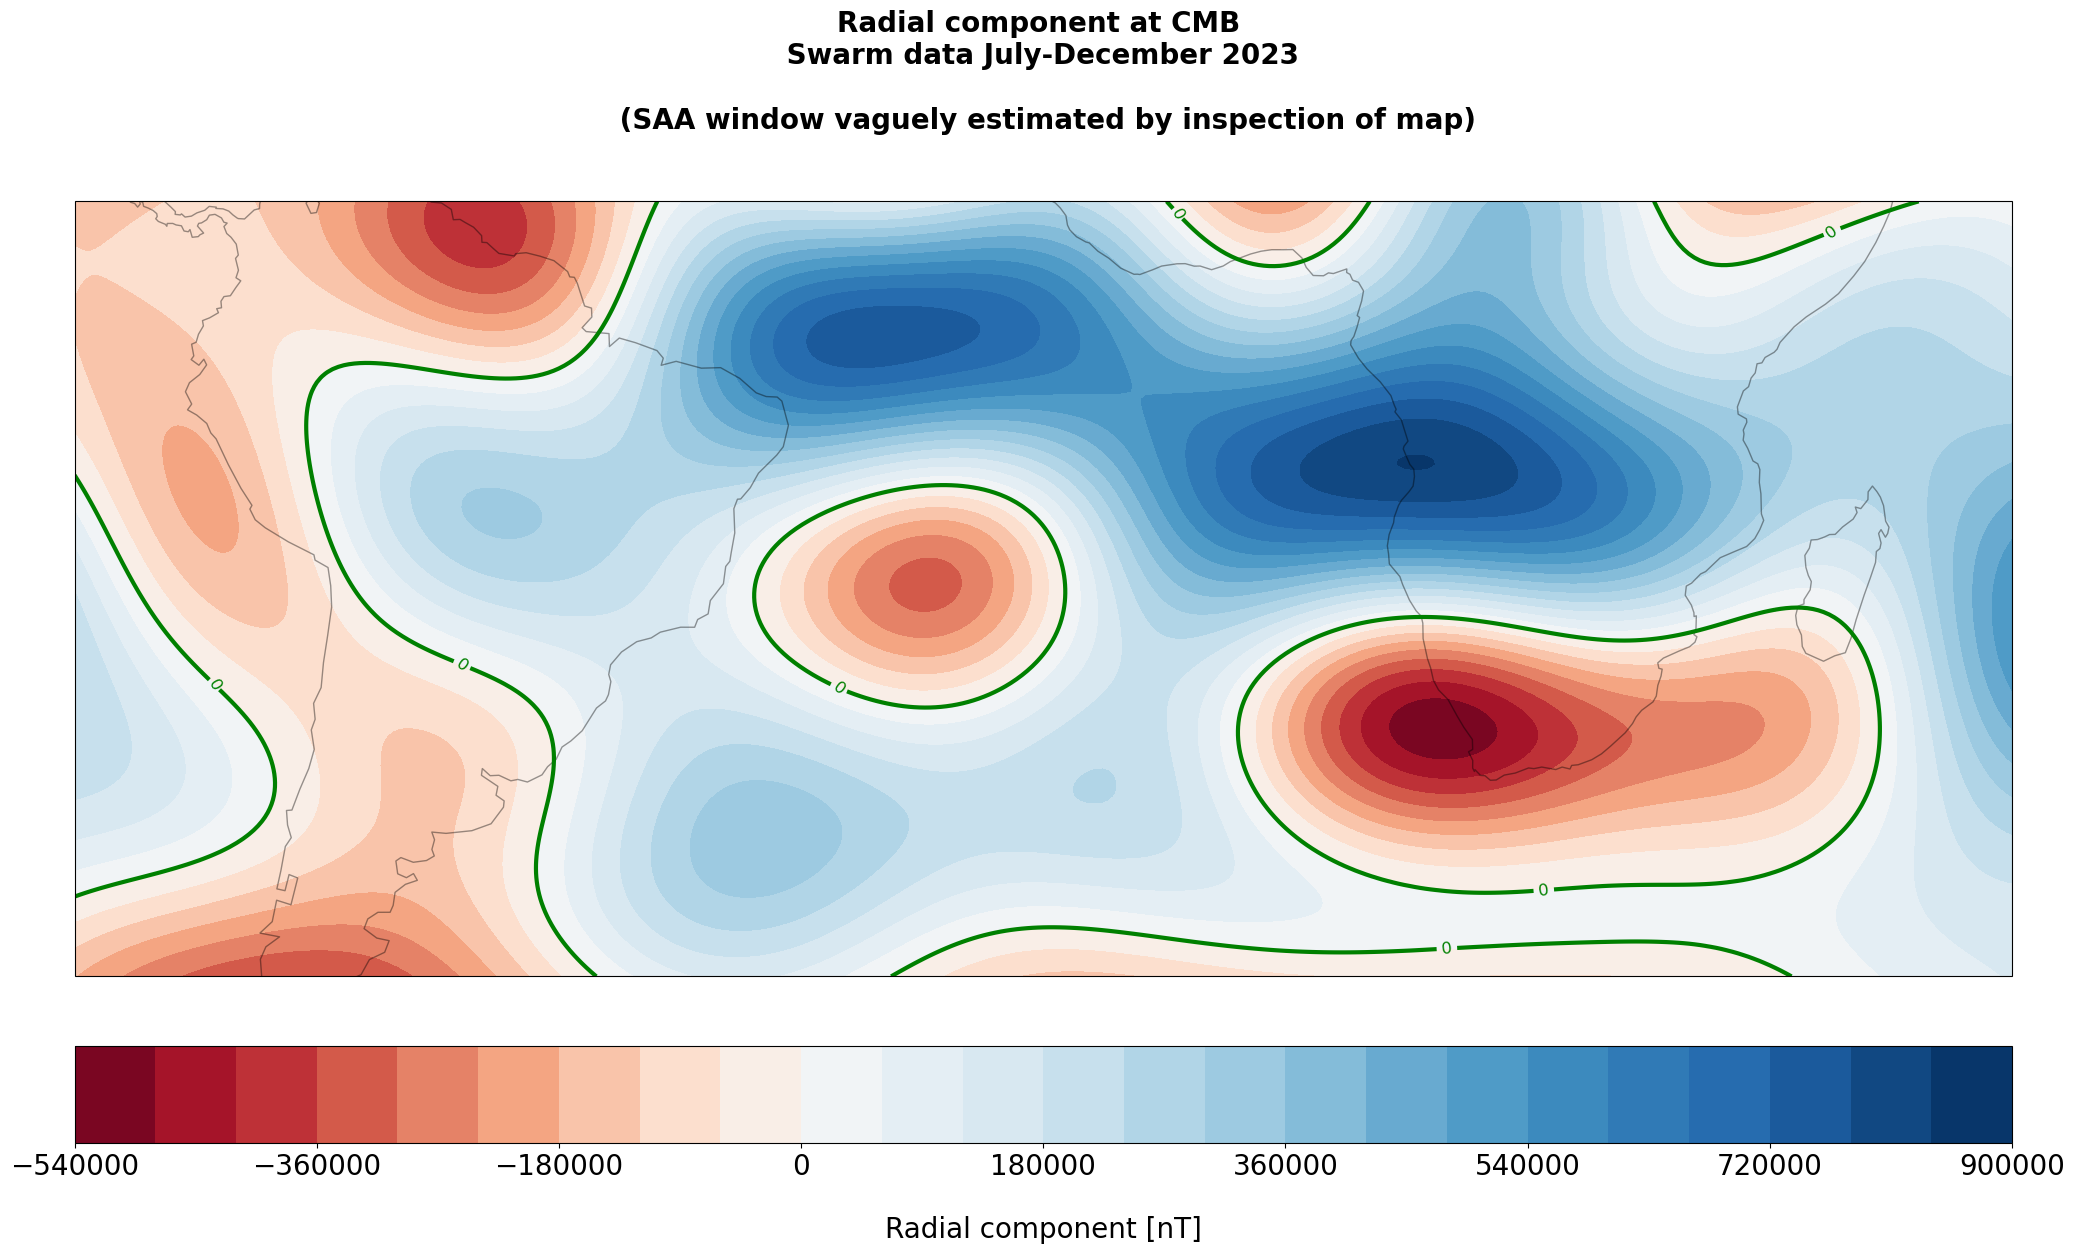

In [14]:
# Define the specific contour level to highlight
specific_contour_level = 0

fig = plt.figure(figsize=(25, 18))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines('110m', alpha=0.4)
filled_c = ax.contourf(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape), transform=ccrs.PlateCarree(), cmap = shifted_cmap, levels = 25)
# line_c = ax.contour(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape), levels=filled_c.levels, colors=['grey'], 
#                     linewidths = 1, transform=ccrs.PlateCarree())
ax.set_extent([SAA_extent[1][0], SAA_extent[1][1], 90 - SAA_extent[0][0], 90 - SAA_extent[0][1]], crs=ccrs.PlateCarree()) # takes long, lat

# Highlight the specific contour level with a distinct color and thicker linewidth
specific_contour = ax.contour(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape),
                              levels=[specific_contour_level], colors='green', linewidths=3)
# Add labels to the specific contour level
plt.clabel(specific_contour, fmt={specific_contour_level: str(specific_contour_level)}, fontsize=12, inline=True)

clb = fig.colorbar(filled_c, orientation='horizontal', pad = 0.05)
clb.ax.tick_params(labelsize=20)
clb.set_label('Radial component [nT]', labelpad=25, fontsize=20)
plt.title('Radial component at CMB \n Swarm data July-December 2023 \n \n (SAA window vaguely estimated by inspection of map)\n \n', weight='bold', fontsize=20) 

Text(0.5, 1.0, 'Radial component at CMB \n Swarm data July-December 2023 \n \n (SAA window vaguely estimated by inspection of map)\n \n')

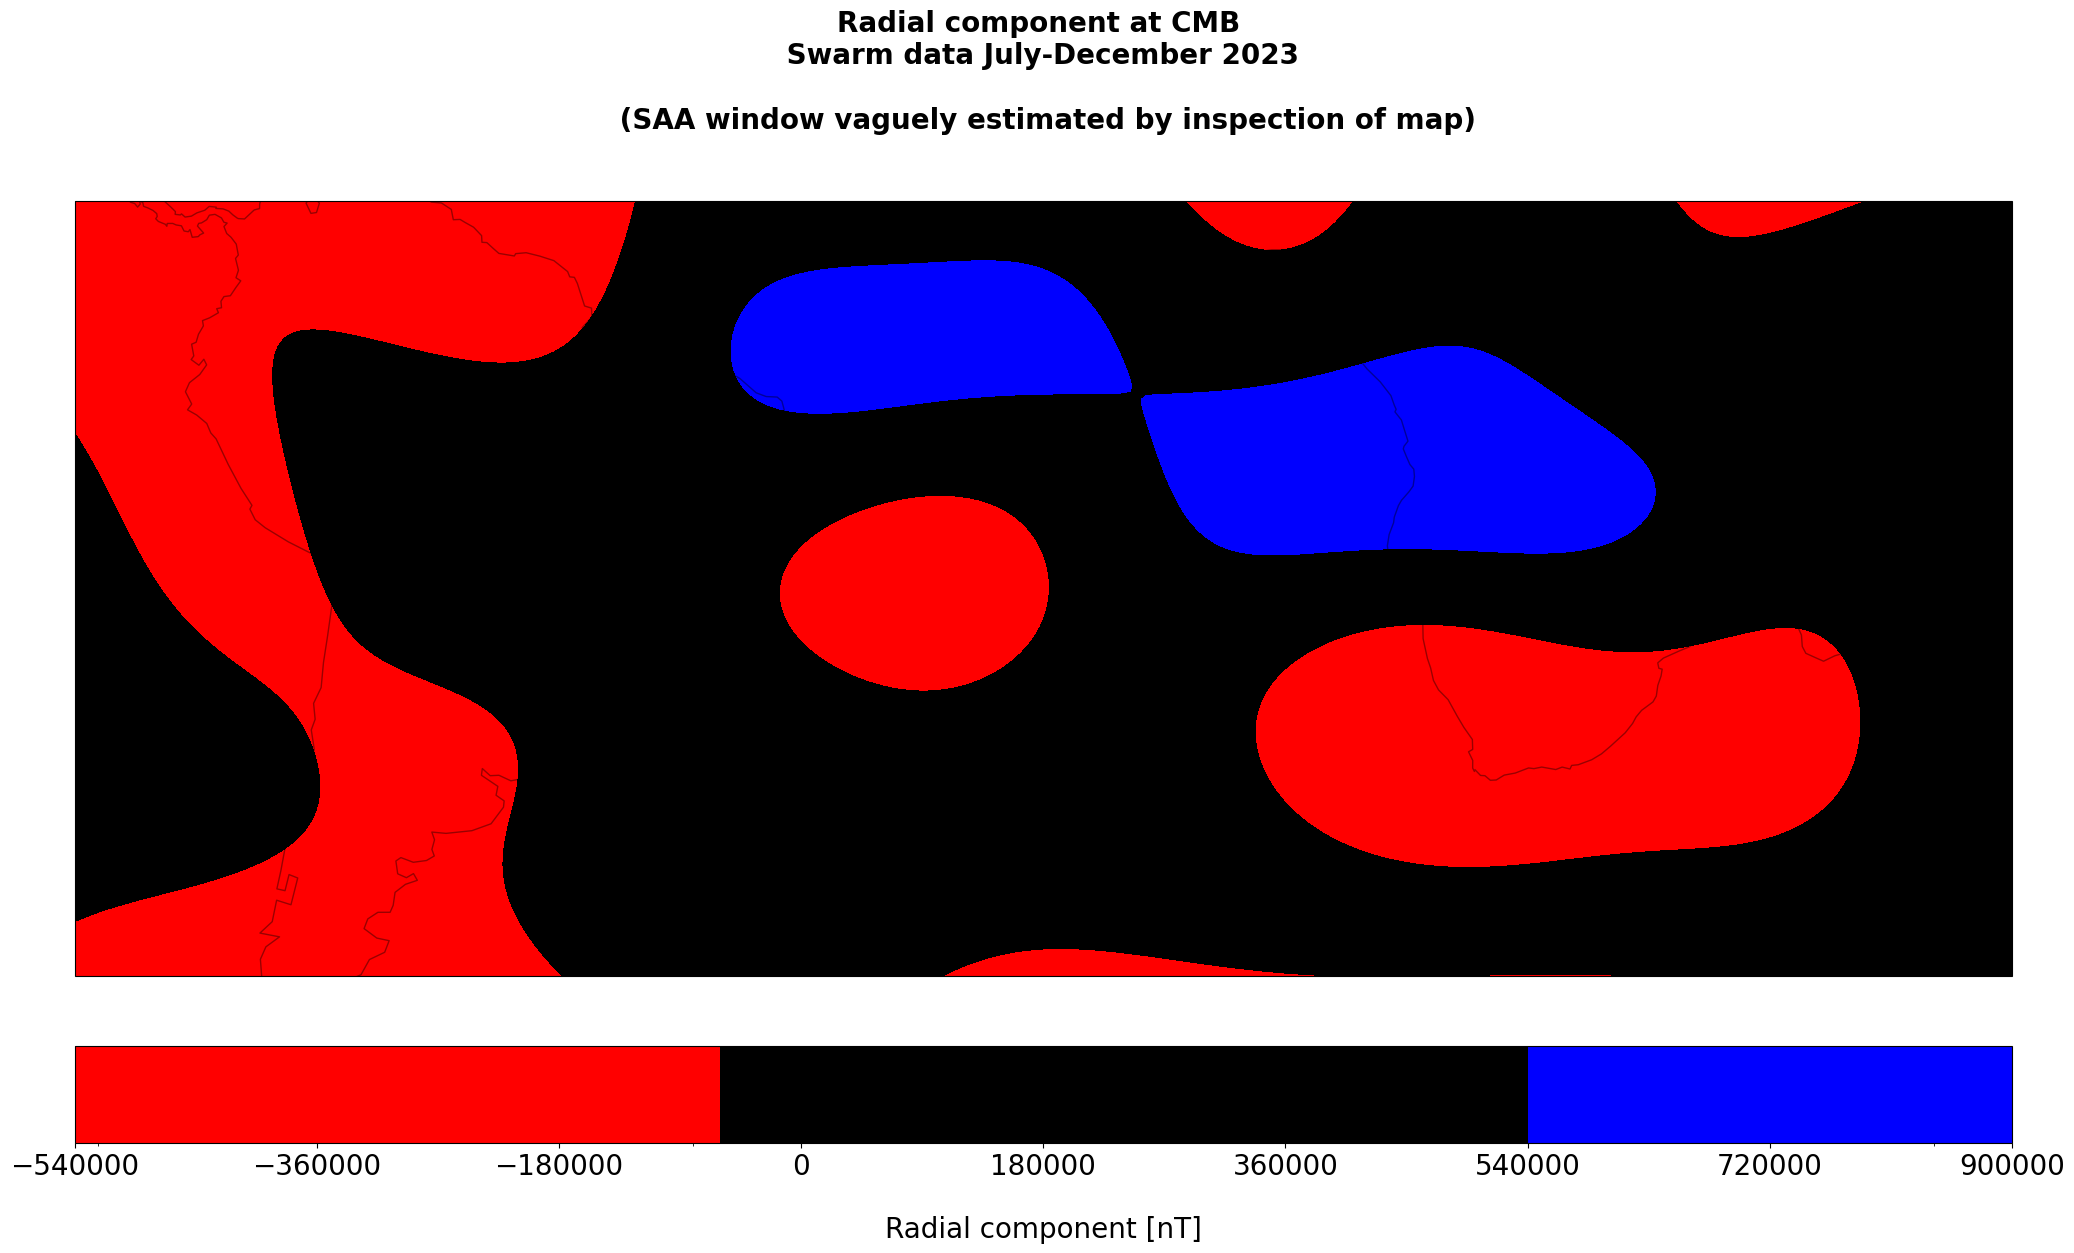

In [15]:
# Define the specific contour level to highlight
specific_contour_level = 0

fig = plt.figure(figsize=(25, 18))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines('110m', alpha=0.4)
filled_c = ax.contourf(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape), transform=ccrs.PlateCarree(), cmap = shifted_cmap, levels = 25)
# line_c = ax.contour(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape), levels=filled_c.levels, colors=['grey'], 
#                     linewidths = 1, transform=ccrs.PlateCarree())
ax.set_extent([SAA_extent[1][0], SAA_extent[1][1], 90 - SAA_extent[0][0], 90 - SAA_extent[0][1]], crs=ccrs.PlateCarree()) # takes long, lat



# Create a custom colormap where values outside the specified range are black, values smaller than the min are red, and values larger than the max are blue
cmap_colors = ['red', 'black', 'blue']
cmap_values = [specific_value_min, 0, specific_value_max]
cmap = plt.cm.colors.ListedColormap(cmap_colors, name='custom_cmap')
bounds = [np.min(d_CMB_r_SAA), specific_value_min, specific_value_max, np.max(d_CMB_r_SAA)]
norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

# Plot the filled contours with the custom colormap
filled_c = ax.contourf(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape),
                       transform=ccrs.PlateCarree(), cmap=cmap, levels=25, norm=norm)

# Plot the contour lines
# contour_lines = ax.contour(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape),
#                             levels=25, colors='k')

# # Highlight the specific contour level with a distinct color and thicker linewidth
# specific_contour = ax.contour(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape),
#                               levels=[closest_level_min], colors='red', linewidths=3)
# # Add labels to the specific contour level
# plt.clabel(specific_contour, fmt={closest_level_min: str(closest_level_min)}, fontsize=12, inline=True)

# # Highlight the specific contour level with a distinct color and thicker linewidth
# specific_contour = ax.contour(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape),
#                               levels=[closest_level_max], colors='blue', linewidths=3)
# # Add labels to the specific contour level
# plt.clabel(specific_contour, fmt={closest_level_max: str(closest_level_max)}, fontsize=12, inline=True)


clb = fig.colorbar(filled_c, orientation='horizontal', pad = 0.05)
clb.ax.tick_params(labelsize=20)
clb.set_label('Radial component [nT]', labelpad=25, fontsize=20)
plt.title('Radial component at CMB \n Swarm data July-December 2023 \n \n (SAA window vaguely estimated by inspection of map)\n \n', weight='bold', fontsize=20) 

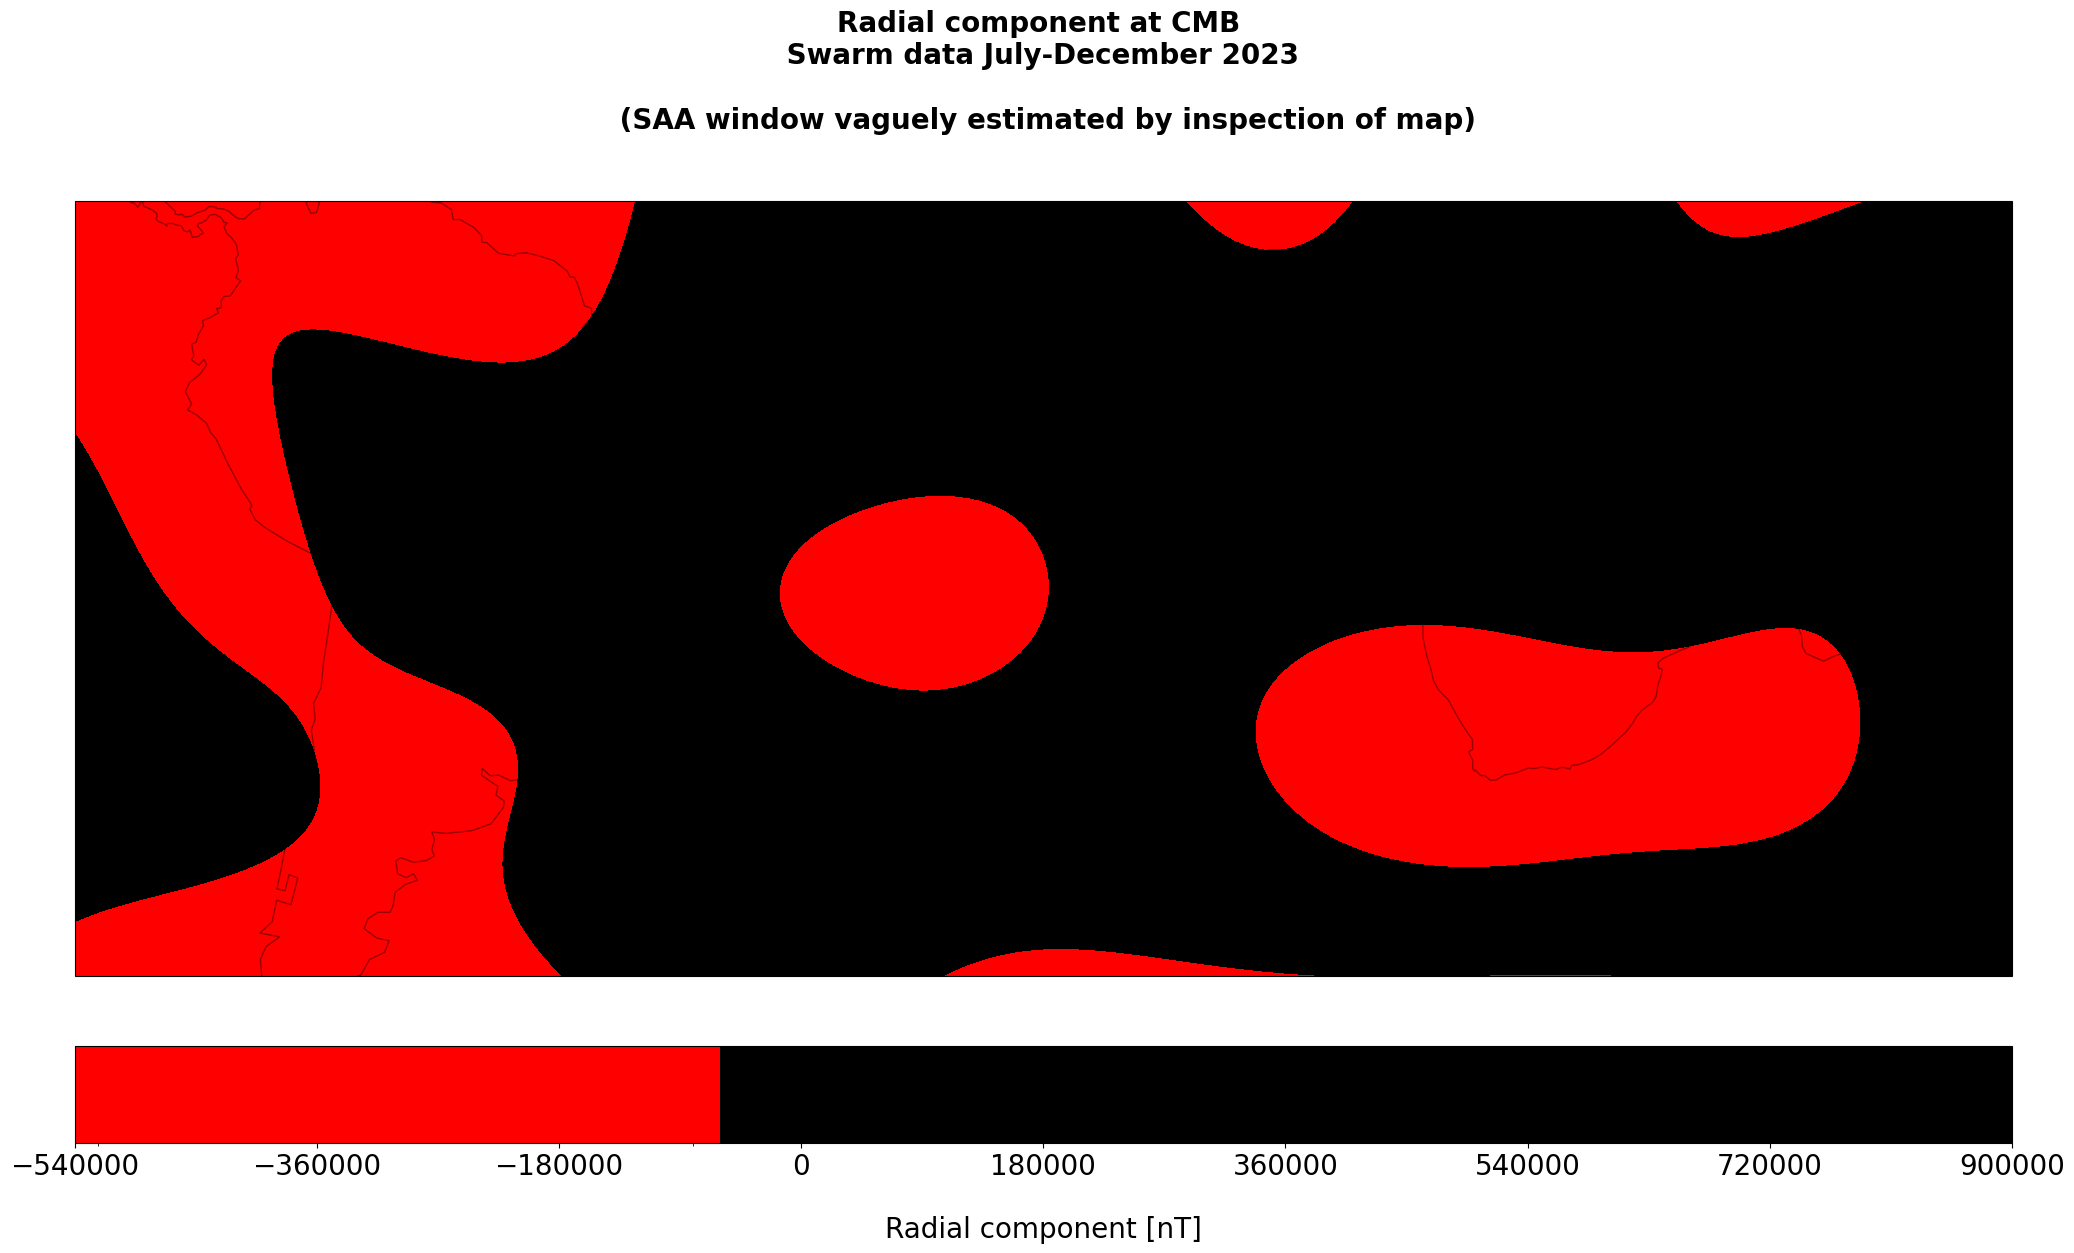

In [16]:
# Define the specific contour level to highlight
specific_contour_level = 0

fig = plt.figure(figsize=(25, 18))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines('110m', alpha=0.4)
filled_c = ax.contourf(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape), transform=ccrs.PlateCarree(), cmap = shifted_cmap, levels = 25)
# line_c = ax.contour(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape), levels=filled_c.levels, colors=['grey'], 
#                     linewidths = 1, transform=ccrs.PlateCarree())
ax.set_extent([SAA_extent[1][0], SAA_extent[1][1], 90 - SAA_extent[0][0], 90 - SAA_extent[0][1]], crs=ccrs.PlateCarree()) # takes long, lat



# Create a custom colormap where values outside the specified range are black, values smaller than the min are red, and values larger than the max are blue
cmap_colors = ['red', 'black']
cmap_values = [specific_value_min, 0, specific_value_max]
cmap = plt.cm.colors.ListedColormap(cmap_colors, name='custom_cmap')
bounds = [np.min(d_CMB_r_SAA), specific_value_min]#, specific_value_max, np.max(d_CMB_r_SAA)]
norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

# Plot the filled contours with the custom colormap
filled_c = ax.contourf(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape),
                       transform=ccrs.PlateCarree(), cmap=cmap, levels=25, norm=norm)

clb = fig.colorbar(filled_c, orientation='horizontal', pad = 0.05)
clb.ax.tick_params(labelsize=20)
clb.set_label('Radial component [nT]', labelpad=25, fontsize=20)
plt.title('Radial component at CMB \n Swarm data July-December 2023 \n \n (SAA window vaguely estimated by inspection of map)\n \n', weight='bold', fontsize=20) 

plt.savefig('swarm_red_blue_blobs.png', bbox_inches='tight')

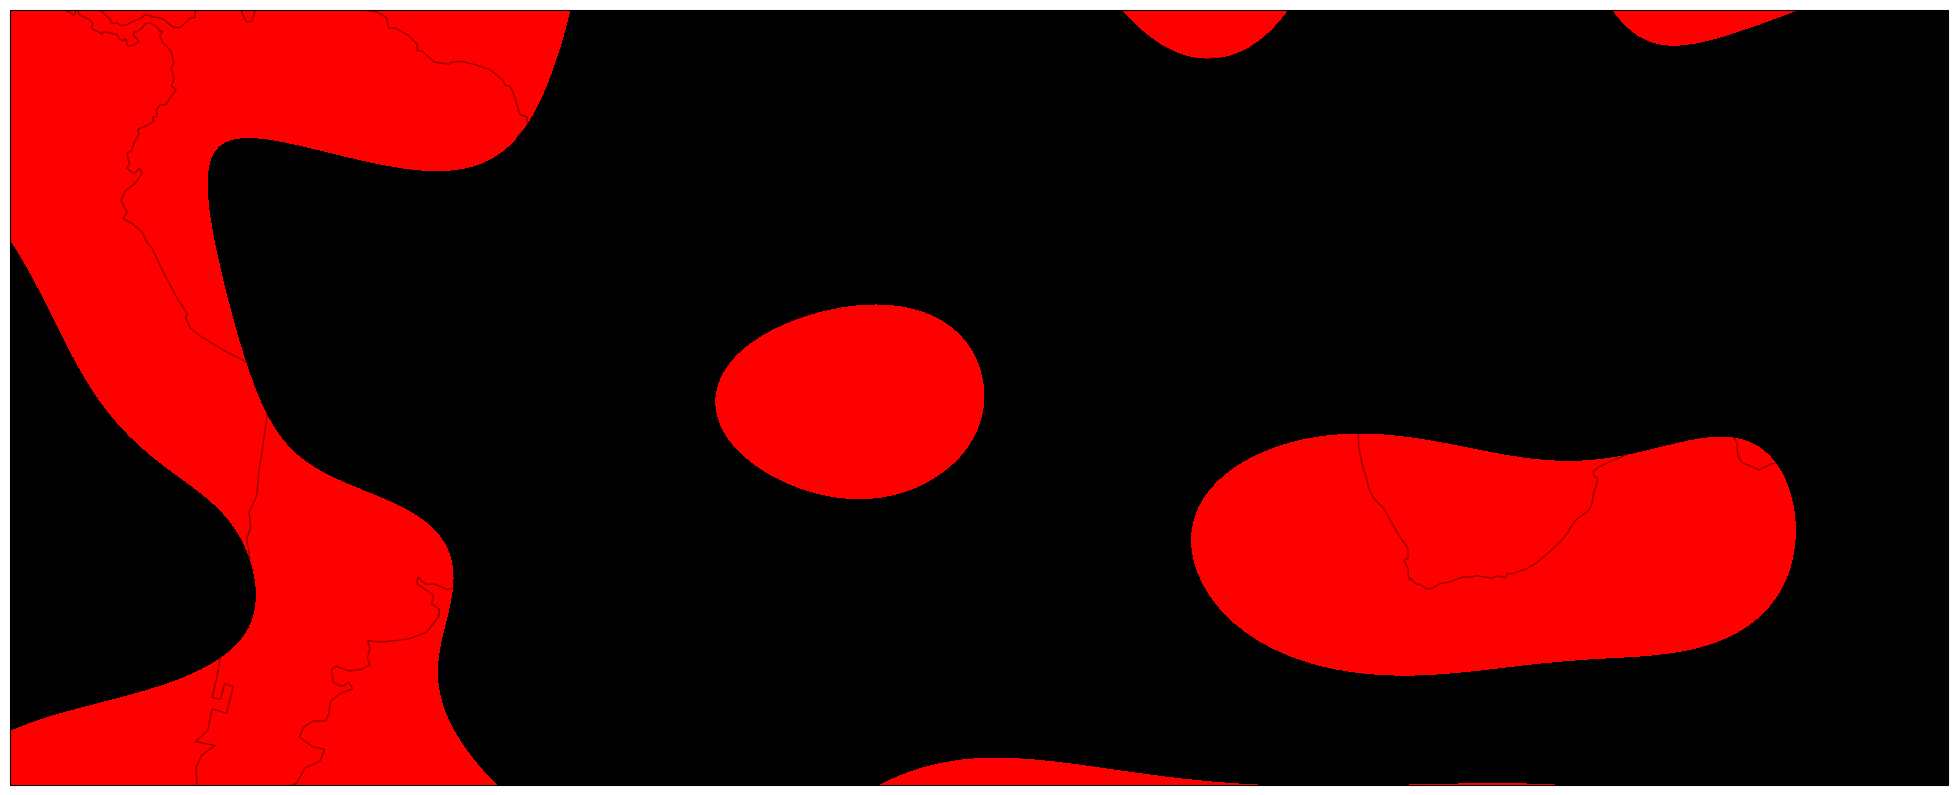

In [26]:
specific_contour_level = 0

fig = plt.figure(figsize=(25, 18))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines('110m', alpha=0.4)
filled_c = ax.contourf(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape), transform=ccrs.PlateCarree(), cmap = shifted_cmap, levels = 25)
# line_c = ax.contour(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape), levels=filled_c.levels, colors=['grey'], 
#                     linewidths = 1, transform=ccrs.PlateCarree())
ax.set_extent([SAA_extent[1][0], SAA_extent[1][1], 90 - SAA_extent[0][0], 90 - SAA_extent[0][1]], crs=ccrs.PlateCarree()) # takes long, lat



# Create a custom colormap where values outside the specified range are black, values smaller than the min are red, and values larger than the max are blue
cmap_colors = ['red', 'black']
cmap_values = [specific_value_min, 0, specific_value_max]
cmap = plt.cm.colors.ListedColormap(cmap_colors, name='custom_cmap')
bounds = [np.min(d_CMB_r_SAA), specific_value_min]#, specific_value_max, np.max(d_CMB_r_SAA)]
norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

# Plot the filled contours with the custom colormap
filled_c = ax.contourf(phi_grid_SAA, 90-theta_grid_SAA, d_CMB_r_SAA.reshape(theta_grid_SAA.shape),
                       transform=ccrs.PlateCarree(), cmap=cmap, levels=25, norm=norm)

# clb = fig.colorbar(filled_c, orientation='horizontal', pad = 0.05)
# clb.ax.tick_params(labelsize=20)
# clb.set_label('Radial component [nT]', labelpad=25, fontsize=20)
# plt.title('Radial component at CMB \n Swarm data July-December 2023 \n \n (SAA window vaguely estimated by inspection of map)\n \n', weight='bold', fontsize=20) 

plt.savefig('swarm_red_blobs.png', bbox_inches='tight')


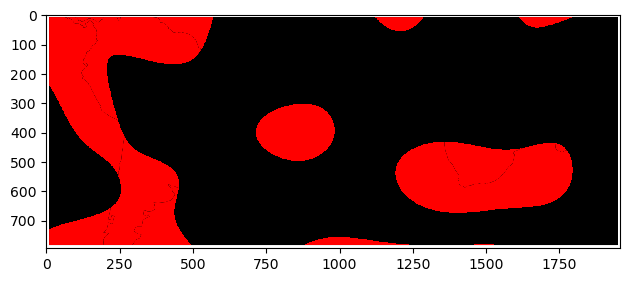

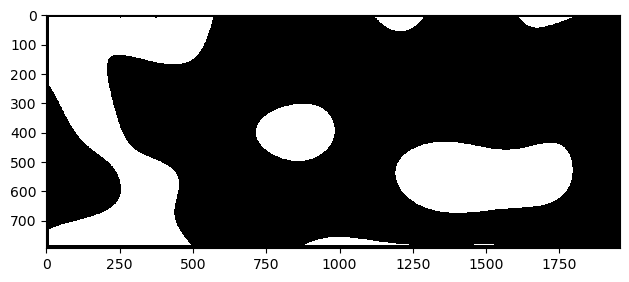

In [72]:

image = io.imread('swarm_red_blobs.png')
io.imshow('swarm_red_blobs.png')
io.show()


def detect_red(im_org):
    r_comp = im_org[:, :, 0]
    g_comp = im_org[:, :, 1]
    b_comp = im_org[:, :, 2]
    #segm_blue = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & (b_comp > 180) & (b_comp < 200)
    segm_red  = (r_comp > 150) & (g_comp < 100) & (b_comp < 100)
    
    segm = [segm_red]
    io.imshow(segm_red)
    # plt.title('DTU sign')
    io.show()

detect_red(image)    

In [81]:
from skimage.util import img_as_float, img_as_ubyte
from skimage.filters import threshold_otsu
from skimage import io, color, measure


def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis('off')
    io.show()


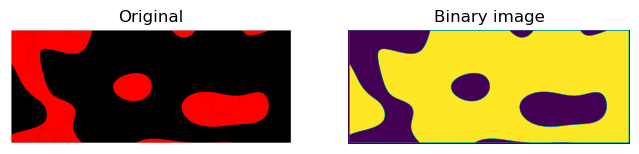

In [86]:
im_org = io.imread("swarm_red_blobs.png")
# Remove the alpha channel if present
if im_org.shape[-1] == 4:
    im_org = im_org[..., :3]  # Keep only the RGB channels


# im_gray = color.rgb2gray(im_org)
# thres = threshold_otsu(im_gray)
im_bin = im_gray < 0.1 # should be threshold found automaticlal??

show_comparison(im_org, im_bin, 'Binary image')

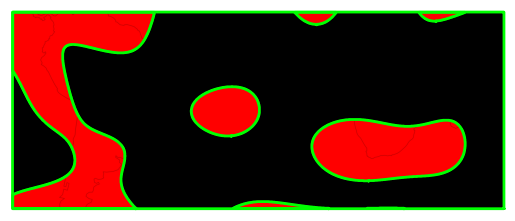

In [110]:
# Read the image
image = io.imread('swarm_red_blobs.png')

# Remove the alpha channel if present
if image.shape[-1] == 4:
    image = image[..., :3]  # Keep only the RGB channels

# Convert the image to grayscale
gray = color.rgb2gray(image)

# Threshold the grayscale image to isolate the red blobs
binary = gray > 0.1  # Adjust the threshold value as needed

# Find contours of the red blobs
contours = measure.find_contours(binary, 0.5)

# Display the original image with the green contours around the red blobs
fig, ax = plt.subplots()
ax.imshow(image)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, c='lime')

plt.axis('off')
plt.show()

Number of blobs: 8


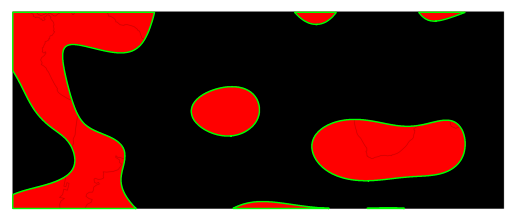

In [128]:
from skimage import io, color, measure


# Read the image
image = io.imread('swarm_red_blobs.png')

# Remove the alpha channel if present
if image.shape[-1] == 4:
    image = image[..., :3]  # Keep only the RGB channels

# Convert the image to grayscale
gray = color.rgb2gray(image)

# Threshold the grayscale image to isolate the red blobs
binary = gray > 0.1  # Adjust the threshold value as needed

# Find contours of the red blobs
contours = measure.find_contours(binary, 0.5)

# Count the number of blobs and label them
num_blobs = len(contours)
print("Number of blobs:", num_blobs)

# Display the original image with the green contours around the red blobs
fig, ax = plt.subplots()
ax.imshow(image)

for contour in contours:
    if binary[int(contour[0][0]), int(contour[0][1])]:  # Check if the starting point is white (inside the blob)
        ax.plot(contour[:, 1], contour[:, 0], linewidth=1, c='lime')

plt.axis('off')
plt.show()

# SAA quantification with BLOB analysis tools from image analysis 
Deriving amplitude and distribution of SAA field
We consider the SAA area as an image by having every observation point be a pixel in the image. Rounding to the nearest of a specific magnitude will leave discretely distributed data. Morphological operations can help neglect the data, which is not considered to be associated to the SAA. The BLOB analysis tools provide smooth deriviation of the pixel-wise area of a BLOB. Knowing the radius to the Earth's core at the CMB, the distance between to adjects pixels can be estimated in the theta and phi direction, respectively.

In [153]:
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import erosion, dilation, opening, closing
from skimage.measure import label, regionprops
from skimage.color import label2rgb


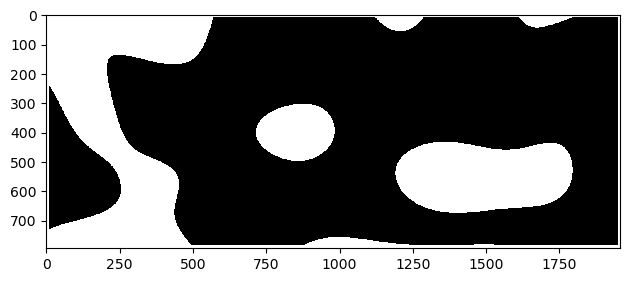

In [159]:
# Read the image
image = io.imread('swarm_red_blobs.png')

# Remove the alpha channel if present
if image.shape[-1] == 4:
    image = image[..., :3]  # Keep only the RGB channels

im = rgb2gray(image)


imshow(im);
im_bw = im>0.1
imshow(im_bw)

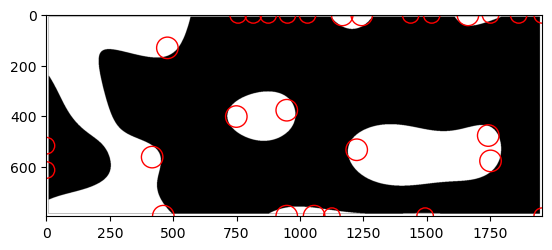

In [165]:
blobs = blob_log(im_bw, max_sigma=30, min_sigma = 23, num_sigma=2, threshold=0.3, overlap = 0.1)
fig, ax = plt.subplots()
ax.imshow(im_bw, cmap='gray')
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), color='r', 
                            fill=False))

In [166]:
def multi_dil(im,num):
    for i in range(num):
        im = dilation(im)
    return im
def multi_ero(im,num):
    for i in range(num):
        im = erosion(im)
    return im


In [168]:
label_im = label(im_cleaned)
imshow(label_im)
fig, ax = plt.subplots(figsize=(10, 100))
imshow(label_im)
for i in regionprops(label_im):
    minr, minc, maxr, maxc = i.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
ax.add_patch(rect)
    ax.set_axis_off()
    
plt.show()

NameError: name 'im_cleaned' is not defined